## Preparar el Entorno

In [1]:
#!pip install shap

In [145]:
#!pip install scikit-learn lightgbm xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.9 MB/s eta 0:00:00m eta 0:00:010:00:01


In [2]:
# Importaciones de librerías de análisis de datos básicas.
import pandas as pd  # Manipulación y análisis de datos.
import numpy as np  # Soporte para vectores y matrices.
import matplotlib.pyplot as plt  # Visualización de datos.
import seaborn as sns  # Visualización de datos basada en matplotlib.
from scipy.stats import randint as sp_randint

# Importaciones de herramientas de Sklearn para modelado y evaluación.
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve  # Herramientas para dividir datos y optimizar parámetros.
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Herramientas para la codificación y escalado de características.
from sklearn.linear_model import LassoCV, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor  # Modelo de regresión basado en árboles de decisión.
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor, StackingRegressor,VotingRegressor  # Modelos de ensamble basados en árboles.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, explained_variance_score  # Métricas de evaluación para modelos de regresión.
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Configuración de Pandas para mejorar la visualización en cuadernos Jupyter.
pd.set_option('display.max_rows', None) # Configurar Pandas para mostrar todas las filas
pd.set_option('display.max_columns', None) # Configurar Pandas para mostrar todas las columnas

# Añadir el directorio padre al path del sistema para permitir la importación de módulos personalizados.
import sys
sys.path.append('../src/utils')

# Importación de módulos personalizados para visualización y preprocesamiento de datos.
from utils import *
from preprocess import * # Módulo personalizado que incluye funciones específicas de preprocesamiento.
from modeling import *

from pycaret.regression import *

## Cargar los Datos

In [3]:
df = pd.read_csv('../data/processed/dataset_complete.csv', sep=';')
df.shape # Verificación

(717, 66)

In [4]:
df.head()

edad  sexo  altura  peso  num calzado    articulacion     localizacion  \
0    36     0     173  65.0         40.0         rodilla           medial   
1    35     1     181  78.0         44.0  sin afectacion  no especificado   
2    45     1     189  88.0         46.0  sin afectacion  no especificado   
3    43     1     182  70.0         44.0             pie           medial   
4    41     1     184  90.0         43.0          pierna        posterior   

              lado  pace_walk  velocidad_walk  step rate_walk  \
0                b   1.291600             5.0      108.456898   
1  no especificado   1.370079             5.0      114.767847   
2  no especificado   1.371909             5.0      100.149777   
3                d   1.318286             5.0      103.976334   
4                b   1.362836             5.0       99.062660   

   stride length_walk  shock_walk  impact gs_walk  braking gs_walk  \
0              1.4267    3.566339        2.310324         2.610172   
1              1.4312    3.119538        1.900867         2.387259   
2              1.6437    2.368494        1.597828         1.558757   
3              1.5381    2.667928        1.708754         1.985392   
4              1.6541    3.610964        2.665554         2.369300   

   footstrike type_walk  pronation excursion_walk  contact ratio_walk  \
0              6.314815                -11.106498           63.724990   
1              6.948276                 -8.176466           62.112399   
2             10.680851                 -4.411249           64.721319   
3             11.180000                 -4.351264           63.545858   
4              7.900000                -10.180634           67.074954   

   total force rate_walk  step length_walk  pronation excursion (mp->to)_walk  \
0              24.952120            0.7133                         -14.725130   
1              30.589598            0.7156                           0.962024   
2              32.726926            0.8218                           0.192496   
3              28.220870            0.7690                           6.506884   
4              33.841236            0.8270                          -6.480006   

   stance excursion (fs->mp)_walk  stance excursion (mp->to)_walk  \
0                       19.445907                       62.315404   
1                       17.340533                       55.030184   
2                        8.006323                       77.799223   
3                        7.471882                       81.783758   
4                       14.944068                       89.849386   

   m1 hipermovil  thomas psoas  thomas rf  thomas tfl  ober  arco aplanado  \
0              0             0          0           0     0              0   
1              0             0          0           0     0              0   
2              0             0          0           0     0              0   
3              3             0          3           0     0              0   
4              0             0          3           1     0              0   

   arco elevado  m1 dfx  m5 hipermovil  arco transverso disminuido  m1 pfx  \
0             3       0              0                           0       0   
1             0       0              0                           0       0   
2             0       0              0                           0       0   
3             0       3              0                           0       0   
4             3       0              0                           0       3   

   arco transverso aumentado  hlf  hl  hr  hav  index minus  tfi  tfe  tti  \
0                          0    0   0   0    3            3    0    3    0   
1                          0    0   0   0    0            0    0    0    0   
2                          0    0   0   0    0            0    0    0    0   
3                          0    0   0   0    0            3    0    0    0   
4                          3    0   0   0    0            3

In [5]:
df = df.drop(columns=['localizacion','lado','zona afectada', 'num calzado', 'articulacion',
                      'm1 hipermovil','thomas psoas','thomas rf','thomas tfl','ober','arco aplanado',
                      'arco elevado','m1 dfx','m5 hipermovil','arco transverso disminuido','m1 pfx',
                      'arco transverso aumentado','hlf','hl','hr','hav','index minus','tfi','tfe','tti','tte',
                      'ober friccion','popliteo','t_hintermann','jack normal','jack no reconstruye',
                      'pronacion no disponible','2heel raise','heel raise','fpi_total_i','fpi_total_d',
                      'tibia vara proximal','tibia vara distal','rotula divergente','rotula convergente',
                      'rotula ascendida','genu valgo','genu varo','genu recurvatum','genu flexum','lunge',
                      'zona afectada'])
df.head()

edad  sexo  altura  peso  pace_walk  velocidad_walk  step rate_walk  \
0    36     0     173  65.0   1.291600             5.0      108.456898   
1    35     1     181  78.0   1.370079             5.0      114.767847   
2    45     1     189  88.0   1.371909             5.0      100.149777   
3    43     1     182  70.0   1.318286             5.0      103.976334   
4    41     1     184  90.0   1.362836             5.0       99.062660   

   stride length_walk  shock_walk  impact gs_walk  braking gs_walk  \
0              1.4267    3.566339        2.310324         2.610172   
1              1.4312    3.119538        1.900867         2.387259   
2              1.6437    2.368494        1.597828         1.558757   
3              1.5381    2.667928        1.708754         1.985392   
4              1.6541    3.610964        2.665554         2.369300   

   footstrike type_walk  pronation excursion_walk  contact ratio_walk  \
0              6.314815                -11.106498           63.724990   
1              6.948276                 -8.176466           62.112399   
2             10.680851                 -4.411249           64.721319   
3             11.180000                 -4.351264           63.545858   
4              7.900000                -10.180634           67.074954   

   total force rate_walk  step length_walk  pronation excursion (mp->to)_walk  \
0              24.952120            0.7133                         -14.725130   
1              30.589598            0.7156                           0.962024   
2              32.726926            0.8218                           0.192496   
3              28.220870            0.7690                           6.506884   
4              33.841236            0.8270                          -6.480006   

   stance excursion (fs->mp)_walk  stance excursion (mp->to)_walk    imc  
0                       19.445907                       62.315404  21.72  
1                       17.340533                       55.030184  23.81  
2                        8.006323                       77.799223  24.64  
3                        7.471882                       81.783758  21.13  
4                       14.944068                       89.849386  26.58

In [6]:
df.shape

(717, 20)

In [7]:
df.describe()

edad        sexo      altura        peso   pace_walk  \
count  717.000000  717.000000  717.000000  717.000000  717.000000   
mean    38.979079    0.666667  173.221757   71.347280    1.349609   
std     13.567990    0.471734    8.864572   13.272632    0.143037   
min     15.000000    0.000000  148.000000   39.000000    0.083356   
25%     29.000000    0.000000  168.000000   62.000000    1.360853   
50%     39.000000    1.000000  173.000000   70.000000    1.370556   
75%     48.000000    1.000000  179.000000   80.000000    1.379229   
max     80.000000    1.000000  197.000000  135.000000    2.793561   

       velocidad_walk  step rate_walk  stride length_walk  shock_walk  \
count      717.000000      717.000000          717.000000  717.000000   
mean         4.970432      111.059742            1.460512    2.319090   
std          0.168766        6.963230            0.150942    0.869845   
min          4.000000       85.079444            0.080300    0.749673   
25%          5.000000      106.965260            1.415500    1.746869   
50%          5.000000      110.768829            1.477600    2.085319   
75%          5.000000      114.542265            1.534200    2.645622   
max          5.000000      165.522552            2.024550    8.328855   

       impact gs_walk  braking gs_walk  footstrike type_walk  \
count      717.000000       717.000000            717.000000   
mean         1.546282         1.634164              8.286613   
std          0.665171         0.641817              2.607825   
min          0.445394         0.586561              1.250000   
25%          1.132492         1.209095              6.142857   
50%          1.363766         1.496472              8.641509   
75%          1.786143         1.887925             10.358491   
max          6.403026         5.236189             15.403509   

       pronation excursion_walk  contact ratio_walk  total force rate_walk  \
count                717.000000          717.000000             717.000000   
mean                  -7.339779           63.468706              22.057213   
std                    4.995025            1.834326               7.648778   
min                  -29.314351           41.133361               5.951576   
25%                   -9.949229           62.571985              14.923921   
50%                   -6.237092           63.572288              21.696173   
75%                   -3.770695           64.425029              27.909278   
max                   22.671300           71.494361              52.164520   

       step length_walk  pronation excursion (mp->to)_walk  \
count        717.000000                         717.000000   
mean           0.784957                          -3.694352   
std            0.601167                           7.460455   
min            0.040100                         -22.855125   
25%            0.709000                          -8.719559   
50%            0.739100                          -3.900480   
75%            0.767700                           1.014514   
max            7.663500                          19.832126   

       stance excursion (fs->mp)_walk  stance excursion (mp->to)_walk  \
count                      717.000000                      717.000000   
mean                        14.646706                       69.499282   
std                          6.702769                        9.603917   
min                         -0.159270                       32.311573   
25%                          9.165190                       62.860238   
50%                         13.714370                       70.205739   
75%                         20.009629                       76.505691   
max                         37.078459                       93.933162   

              imc  
count  717.000000  
mean    23.677434  
std      3.421989  
min     15.040000  
25%     21.300000  
50%     23.390000  
75%     25.450000  
max     41.670000

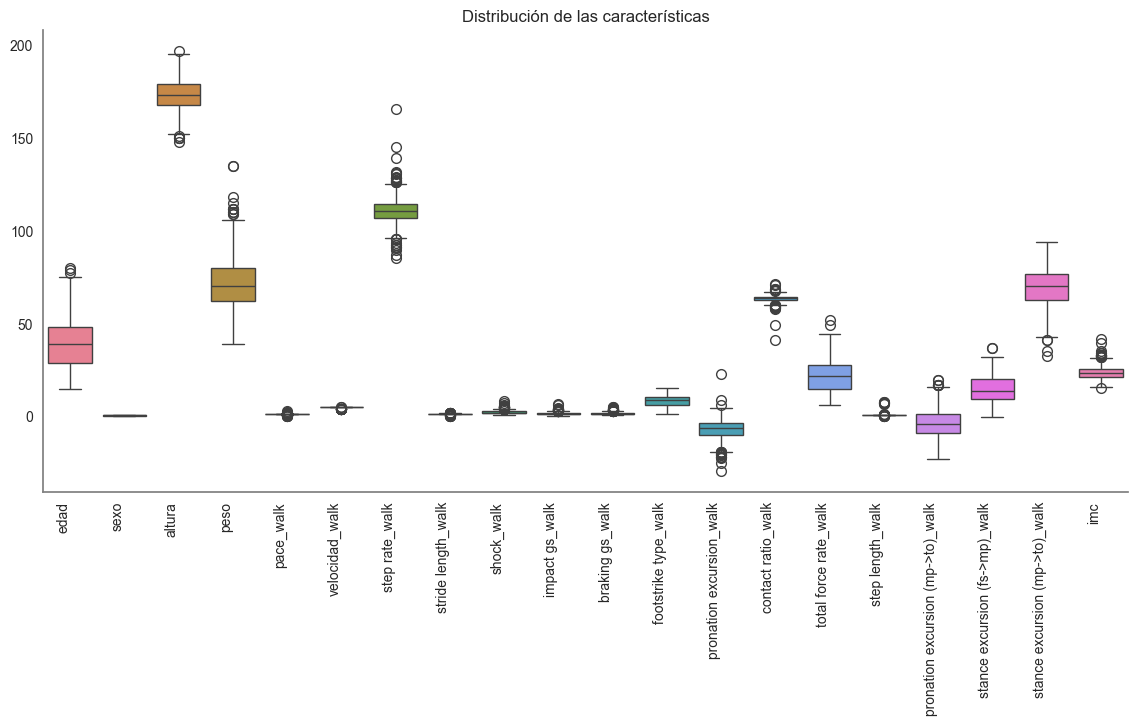

In [8]:
plot_boxplot(df)

## Ingeniería de Características

In [9]:
# df['pace_force_interaction'] = df['pace_walk'] * df['total_force_rate_walk']

- **pace_walk** esencialmente ya captura la relación entre **stride_length_walk** y **step_rate_walk**
- **pace_walk y total_force_rate_walk**: Esto podría proporcionar insights útiles sobre cómo la velocidad afecta la fuerza ejercida, lo cual puede ser valioso para entender la eficiencia o el esfuerzo físico durante la marcha.

## División en train y test

In [10]:
X = df.drop('edad', axis=1)  # Eliminar la columna objetivo del conjunto de características
y = df['edad']               # Definir el conjunto objetivo

# Dividir el conjunto de datos inicialmente en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Dimensiones del dataset de train: {X_train.shape} | {y_train.shape}')
print(f'Dimensiones del dataset de test: {X_test.shape} | {y_test.shape}')

# Guardamos
#X_train.to_csv('../data/processed/edad/X_train.csv', sep=';', decimal='.', index=False)
#X_test.to_csv('../data/processed/edad/X_test.csv', sep=';', decimal='.', index=False)

#y_train.to_csv('../data/processed/edad/y_train.csv', sep=';', decimal='.', index=False)
#y_test.to_csv('../data/processed/edad/y_test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de train: (573, 19) | (573,)
Dimensiones del dataset de test: (144, 19) | (144,)


In [11]:
# Cargar los dataset
#X_train = pd.read_csv('../data/processed/X_train.csv', sep=';', decimal='.')
#X_test = pd.read_csv('../data/processed/X_test.csv', sep=';', decimal='.')

#y_train = pd.read_csv('../data/processed/y_train.csv', sep=';', decimal='.')
#y_test = pd.read_csv('../data/processed/y_test.csv', sep=';', decimal='.')

X_train.head()

sexo  altura  peso  pace_walk  velocidad_walk  step rate_walk  \
56      0     172  75.0   1.368319             5.0      109.194179   
204     0     162  48.0   1.368103             5.0      122.478141   
319     1     175  84.0   1.373916             5.0      104.662392   
529     0     165  59.0   1.323587             5.0      117.714762   
24      1     180  80.0   1.466770             5.0      103.557772   

     stride length_walk  shock_walk  impact gs_walk  braking gs_walk  \
56               1.5016    1.524022        1.057431         1.038486   
204              1.3394    2.092592        1.234906         1.653794   
319              1.5718    2.056176        1.132492         1.664708   
529              1.3621    2.612318        1.213409         2.297158   
24               1.6977    2.345449        1.390545         1.798294   

     footstrike type_walk  pronation excursion_walk  contact ratio_walk  \
56               9.641509                 -5.684268           65.027124   
204             10.135593                 -4.712142           63.545308   
319              9.122449                 -5.873743           64.201322   
529             13.290698                 -3.467495           61.867358   
24              10.170213                 -6.251336           65.817260   

     total force rate_walk  step length_walk  \
56               25.497243            0.7508   
204              36.370124            0.6697   
319              28.241222            0.7859   
529              13.023283            0.6810   
24               30.570762            0.8489   

     pronation excursion (mp->to)_walk  stance excursion (fs->mp)_walk  \
56                           -7.434855                       10.572534   
204                          -1.344819                        9.485441   
319                          -6.815706                       12.528708   
529                          -2.696228                        2.923158   
24                          -11.913247                        9.883991   

     stance excursion (mp->to)_walk    imc  
56                        79.712572  25.35  
204                       70.492861  18.29  
319                       70.281267  27.43  
529                       84.663890  21.67  
24                        84.795562  24.69

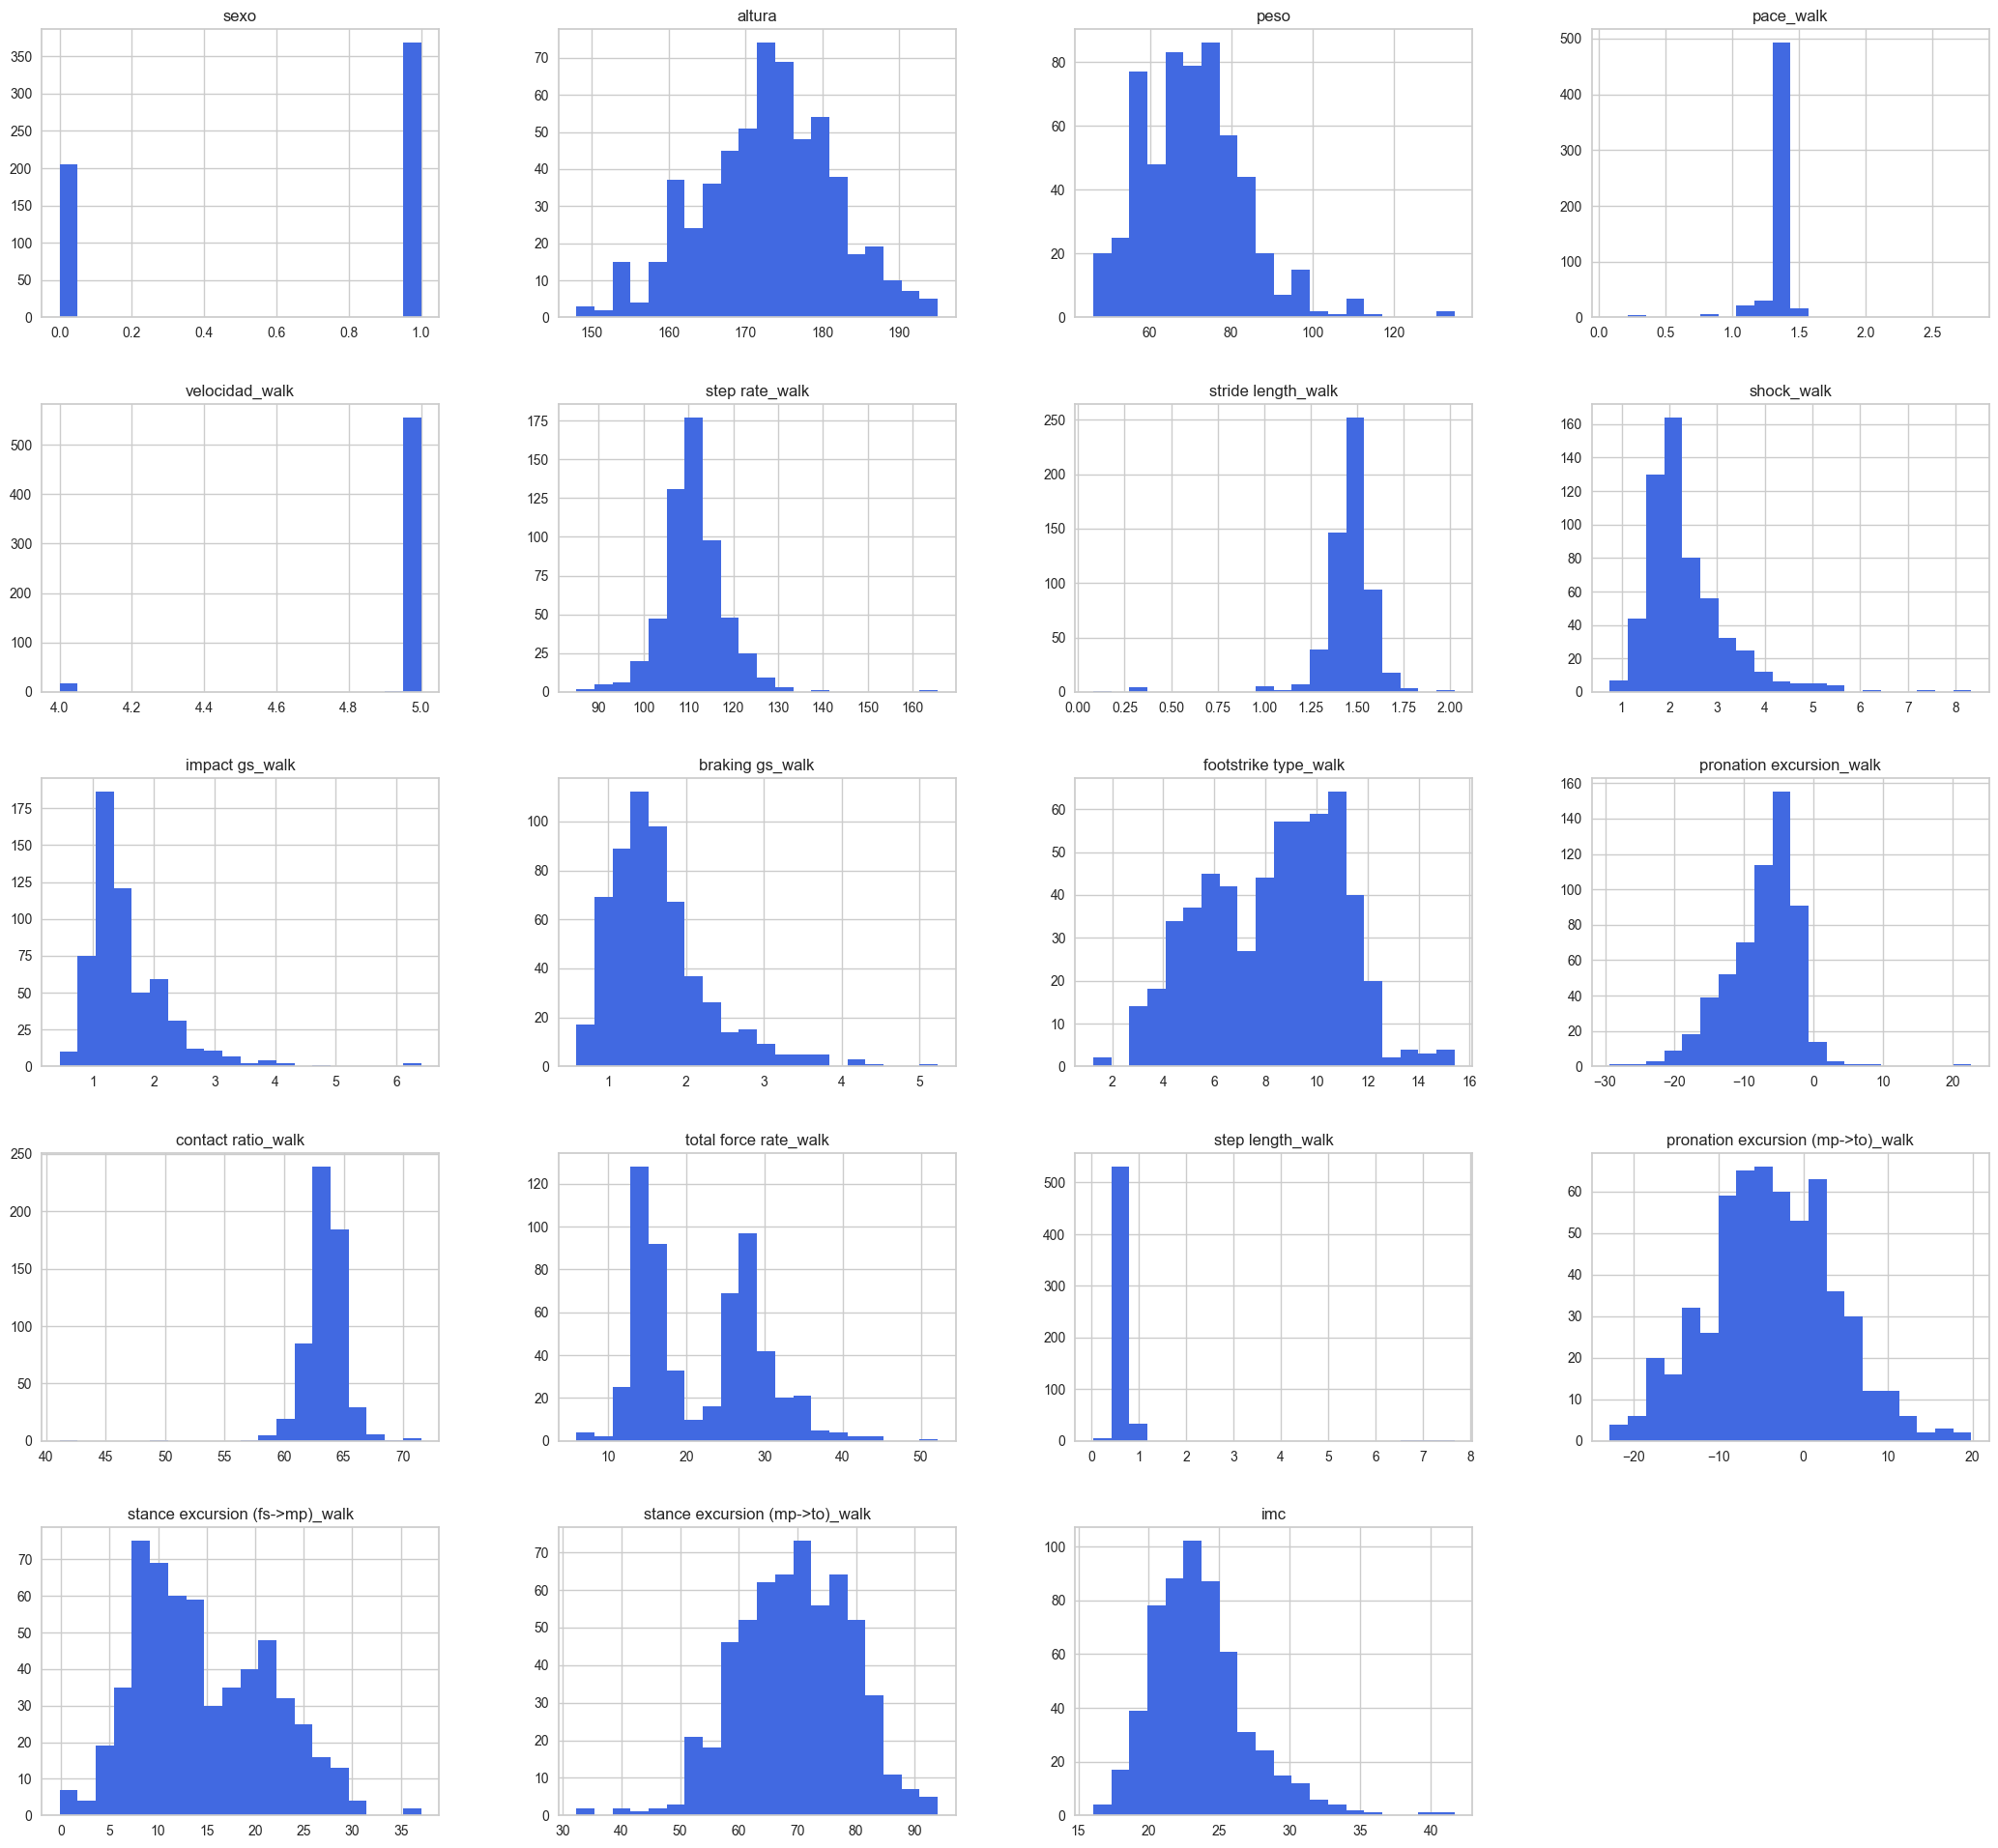

In [12]:
X_train.hist(bins=20, figsize=(26,24), color='royalblue')
plt.show()

In [13]:
X_train.describe().round(3)

sexo   altura     peso  pace_walk  velocidad_walk  step rate_walk  \
count  573.000  573.000  573.000    573.000          573.00         573.000   
mean     0.642  172.766   70.733      1.348            4.97         111.269   
std      0.480    8.739   12.980      0.152            0.17           6.946   
min      0.000  148.000   46.000      0.083            4.00          85.079   
25%      0.000  167.000   62.000      1.361            5.00         107.557   
50%      1.000  173.000   70.000      1.371            5.00         111.066   
75%      1.000  179.000   78.000      1.379            5.00         114.683   
max      1.000  195.000  135.000      2.794            5.00         165.523   

       stride length_walk  shock_walk  impact gs_walk  braking gs_walk  \
count             573.000     573.000         573.000          573.000   
mean                1.456       2.335           1.558            1.644   
std                 0.155       0.883           0.678            0.648   
min                 0.080       0.750           0.445            0.587   
25%                 1.410       1.764           1.139            1.209   
50%                 1.472       2.103           1.372            1.514   
75%                 1.529       2.655           1.790            1.909   
max                 2.025       8.329           6.403            5.236   

       footstrike type_walk  pronation excursion_walk  contact ratio_walk  \
count               573.000                   573.000             573.000   
mean                  8.288                    -7.356              63.456   
std                   2.632                     5.078               1.897   
min                   1.250                   -29.314              41.133   
25%                   6.056                   -10.102              62.589   
50%                   8.667                    -6.268              63.572   
75%                  10.342                    -3.845              64.394   
max                  15.404                    22.671              71.494   

       total force rate_walk  step length_walk  \
count                573.000           573.000   
mean                  21.821             0.773   
std                    7.605             0.541   
min                    5.952             0.040   
25%                   14.845             0.705   
50%                   20.208             0.736   
75%                   27.788             0.765   
max                   52.165             7.664   

       pronation excursion (mp->to)_walk  stance excursion (fs->mp)_walk  \
count                            573.000                         573.000   
mean                              -3.776                          14.642   
std                                7.393                           6.776   
min                              -22.855                          -0.159   
25%                               -8.802                           9.196   
50%                               -3.900                          13.487   
75%                                1.075                          20.099   
max                               19.832                          37.078   

       stance excursion (mp->to)_walk      imc  
count                         573.000  573.000  
mean                           69.486   23.605  
std                             9.578    3.377  
min                            32.312   16.050  
25%                            62.860   21.260  
50%                            70.118   23.200  
75%                            76.392   25.250  
max                            93.933   41.670

## Escalado y Transformación de Características

In [14]:
X_train1 = X_train.iloc[:, 0:len(X_train.columns)]
X_train2 = X_train.iloc[:, 0:len(X_train.columns)]

scaleStandard = StandardScaler()
X_train_ss = pd.DataFrame(scaleStandard.fit_transform(X_train1), columns = X_train.columns)
X_test_ss = pd.DataFrame(scaleStandard.transform(X_test), columns = X_test.columns)
X_train_ss.describe().round(3)

sexo   altura     peso  pace_walk  velocidad_walk  step rate_walk  \
count  573.000  573.000  573.000    573.000         573.000         573.000   
mean     0.000    0.000   -0.000     -0.000          -0.000           0.000   
std      1.001    1.001    1.001      1.001           1.001           1.001   
min     -1.340   -2.836   -1.907     -8.317          -5.717          -3.774   
25%     -1.340   -0.660   -0.673      0.082           0.176          -0.535   
50%      0.746    0.027   -0.057      0.146           0.176          -0.029   
75%      0.746    0.714    0.560      0.202           0.176           0.492   
max      0.746    2.546    4.956      9.502           0.176           7.817   

       stride length_walk  shock_walk  impact gs_walk  braking gs_walk  \
count             573.000     573.000         573.000          573.000   
mean               -0.000      -0.000          -0.000           -0.000   
std                 1.001       1.001           1.001            1.001   
min                -8.859      -1.797          -1.642           -1.634   
25%                -0.296      -0.647          -0.619           -0.672   
50%                 0.104      -0.262          -0.274           -0.202   
75%                 0.470       0.363           0.343            0.409   
max                 3.665       6.795           7.150            5.548   

       footstrike type_walk  pronation excursion_walk  contact ratio_walk  \
count               573.000                   573.000             573.000   
mean                  0.000                     0.000               0.000   
std                   1.001                     1.001               1.001   
min                  -2.676                    -4.328             -11.778   
25%                  -0.849                    -0.541              -0.458   
50%                   0.144                     0.215               0.061   
75%                   0.781                     0.692               0.495   
max                   2.706                     5.918               4.242   

       total force rate_walk  step length_walk  \
count                573.000           573.000   
mean                  -0.000             0.000   
std                    1.001             1.001   
min                   -2.089            -1.354   
25%                   -0.918            -0.126   
50%                   -0.212            -0.067   
75%                    0.785            -0.014   
max                    3.994            12.739   

       pronation excursion (mp->to)_walk  stance excursion (fs->mp)_walk  \
count                            573.000                         573.000   
mean                               0.000                           0.000   
std                                1.001                           1.001   
min                               -2.583                          -2.186   
25%                               -0.680                          -0.805   
50%                               -0.017                          -0.171   
75%                                0.657                           0.806   
max                                3.196                           3.314   

       stance excursion (mp->to)_walk      imc  
count                         573.000  573.000  
mean                            0.000   -0.000  
std                             1.001    1.001  
min                            -3.885   -2.239  
25%                            -0.692   -0.695  
50%                             0.066   -0.120  
75%                             0.722    0.488  
max                             2.555    5.354

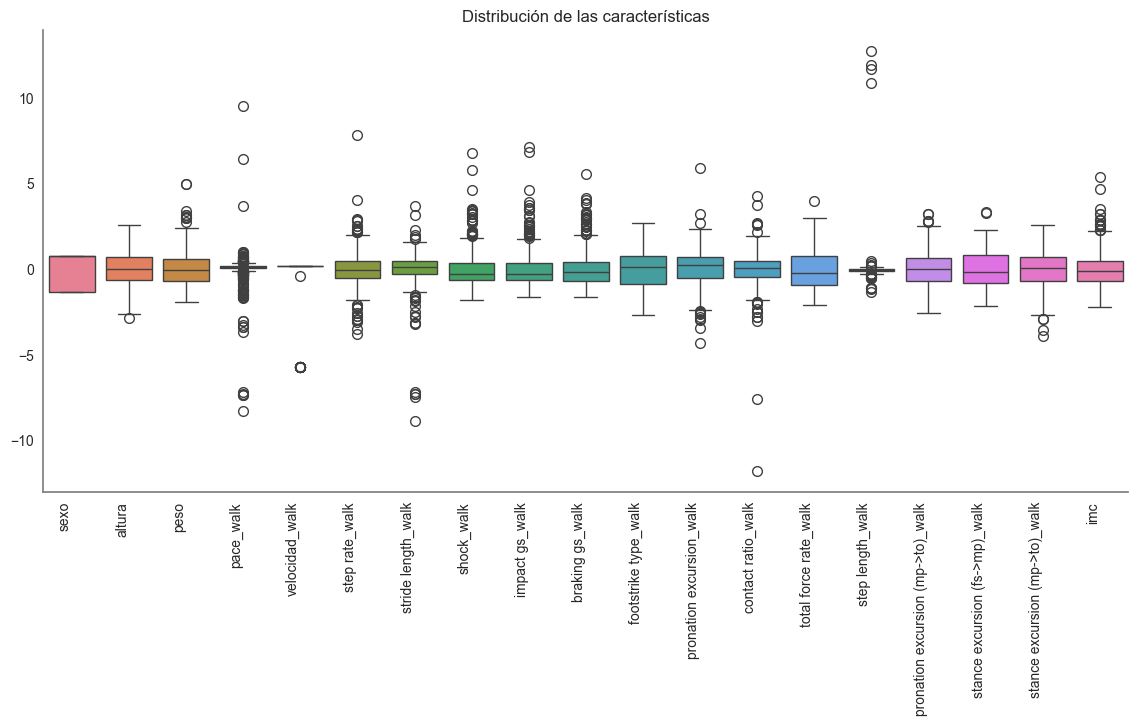

In [15]:
plot_boxplot(X_train_ss)

In [16]:
scaleMinMax = MinMaxScaler(feature_range=(0,1))
X_train_mm = pd.DataFrame(scaleMinMax.fit_transform(X_train2), columns = X_train.columns)
X_test_mm = pd.DataFrame(scaleMinMax.transform(X_test), columns = X_test.columns)
X_train_mm.describe().round(3)

sexo   altura     peso  pace_walk  velocidad_walk  step rate_walk  \
count  573.000  573.000  573.000    573.000          573.00         573.000   
mean     0.642    0.527    0.278      0.467            0.97           0.326   
std      0.480    0.186    0.146      0.056            0.17           0.086   
min      0.000    0.000    0.000      0.000            0.00           0.000   
25%      0.000    0.404    0.180      0.471            1.00           0.279   
50%      1.000    0.532    0.270      0.475            1.00           0.323   
75%      1.000    0.660    0.360      0.478            1.00           0.368   
max      1.000    1.000    1.000      1.000            1.00           1.000   

       stride length_walk  shock_walk  impact gs_walk  braking gs_walk  \
count             573.000     573.000         573.000          573.000   
mean                0.707       0.209           0.187            0.227   
std                 0.080       0.116           0.114            0.139   
min                 0.000       0.000           0.000            0.000   
25%                 0.684       0.134           0.116            0.134   
50%                 0.716       0.179           0.156            0.199   
75%                 0.745       0.251           0.226            0.284   
max                 1.000       1.000           1.000            1.000   

       footstrike type_walk  pronation excursion_walk  contact ratio_walk  \
count               573.000                   573.000             573.000   
mean                  0.497                     0.422               0.735   
std                   0.186                     0.098               0.062   
min                   0.000                     0.000               0.000   
25%                   0.340                     0.370               0.707   
50%                   0.524                     0.443               0.739   
75%                   0.642                     0.490               0.766   
max                   1.000                     1.000               1.000   

       total force rate_walk  step length_walk  \
count                573.000           573.000   
mean                   0.343             0.096   
std                    0.165             0.071   
min                    0.000             0.000   
25%                    0.192             0.087   
50%                    0.308             0.091   
75%                    0.473             0.095   
max                    1.000             1.000   

       pronation excursion (mp->to)_walk  stance excursion (fs->mp)_walk  \
count                            573.000                         573.000   
mean                               0.447                           0.397   
std                                0.173                           0.182   
min                                0.000                           0.000   
25%                                0.329                           0.251   
50%                                0.444                           0.366   
75%                                0.561                           0.544   
max                                1.000                           1.000   

       stance excursion (mp->to)_walk      imc  
count                         573.000  573.000  
mean                            0.603    0.295  
std                             0.155    0.132  
min                             0.000    0.000  
25%                             0.496    0.203  
50%                             0.614    0.279  
75%                             0.715    0.359  
max                             1.000    1.000

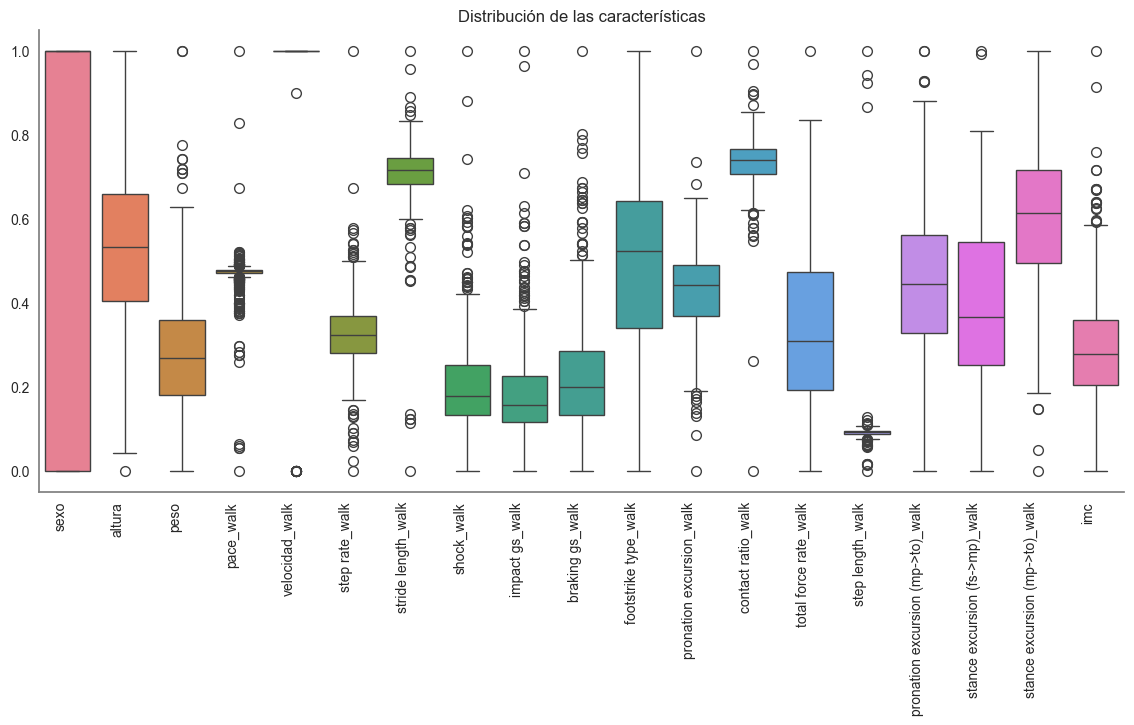

In [17]:
plot_boxplot(X_train_mm)

In [18]:
print(f'Dimensiones del dataset de train: {X_train_ss.shape} | {y_train.shape}')
print(f'Dimensiones del dataset de test: {X_test_ss.shape} | {y_test.shape}\n')
print(f'Dimensiones del dataset de train: {X_train_mm.shape} | {y_train.shape}')
print(f'Dimensiones del dataset de test: {X_test_mm.shape} | {y_test.shape}')

Dimensiones del dataset de train: (573, 19) | (573,)
Dimensiones del dataset de test: (144, 19) | (144,)

Dimensiones del dataset de train: (573, 19) | (573,)
Dimensiones del dataset de test: (144, 19) | (144,)


## Matriz de Correlación

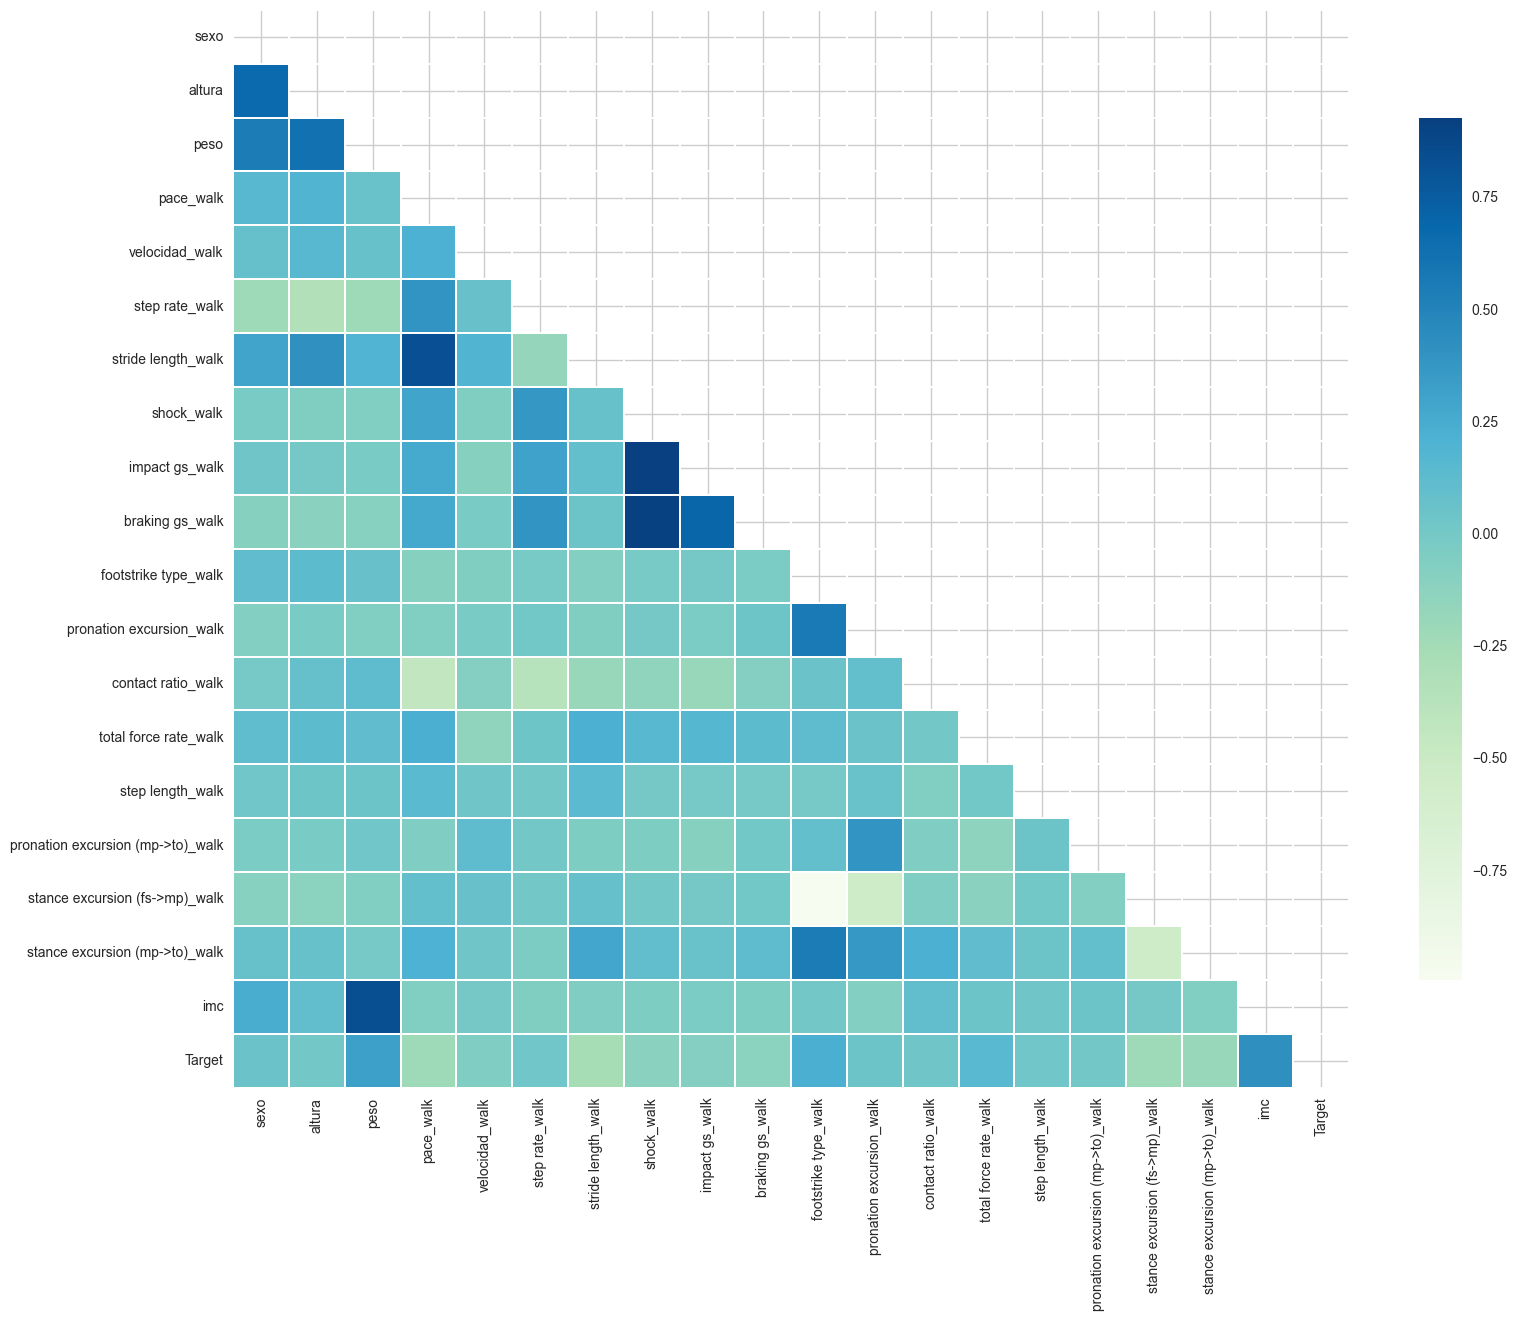

In [19]:
# Concatenar la Variable Objetivo Codificada con X_train
X_train_with_target = X_train.copy()
X_train_with_target['Target'] = y_train

corr_matrix = X_train_with_target.corr()

plot_heatmap(corr_matrix, figsize=(18, 14), cmap="GnBu", title='', annot=False)

## Pycaret

In [20]:
from pycaret.utils import version
version()

'3.3.2'

### DataFrame Completo sin Selección de Características

In [21]:
from pycaret.regression import setup, compare_models

# Configuración inicial de PyCaret
reg_setup = setup(data=df, 
                  target='edad', 
                  session_id=123,  # Para reproducibilidad
                  remove_multicollinearity=True,  # Eliminar multicolinealidad
                  fold_strategy='kfold')

best = compare_models(fold=10)

- **Datos Transformados:** El proceso ha ajustado el conjunto de datos a 717 muestras y 18 características transformadas.
- **Eliminación de Multicolinearidad:** Se ha configurado para eliminar características con una correlación superior al 90%, lo que ayuda a *reducir la redundancia y potencial sobreajuste*.
- **Métricas de los Mejores Modelos:** El `Extra Trees Regressor` es el que presenta las métricas más favorables en este análisis con un **MAE** de **6.5701**, **MSE** de **89.4818** y un **R2** de **0.4867**.

In [22]:
et = create_model('et', fold=10)

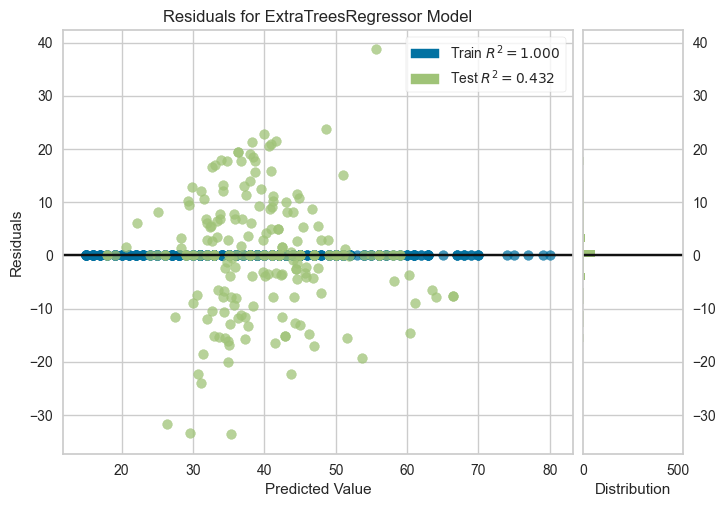

In [23]:
plot_model(et)

El coeficiente R^2 en el conjunto de entrenamiento es `1.000`, lo que indica un **sobreajuste extremo**, mientras que en el conjunto de prueba es `0.429`, lo que sugiere que el modelo **no generaliza bien a nuevos datos**.

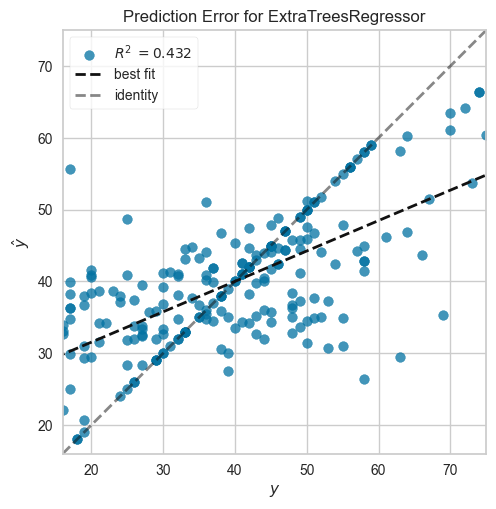

In [24]:
plot_model(et, plot = 'error')

Este gráfico muestra una línea de identidad y una línea de mejor ajuste que difiere de la identidad, reforzando que el modelo no predice con exactitud, particularmente para valores más altos, donde las predicciones tienden a desviarse.

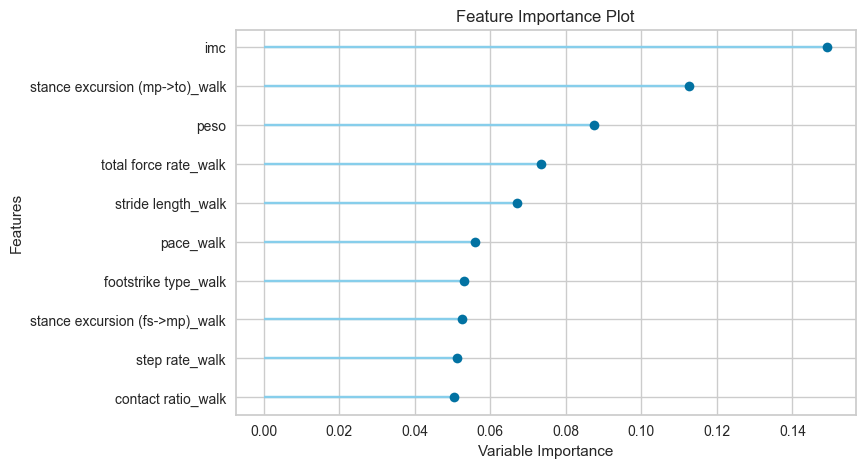

In [25]:
plot_model(et, plot = 'feature')

La gráfica muestra que ciertas características como `imc`, `stance excursion (mp->to)_walk`, y `peso` tienen una importancia relativamente alta, lo que sugiere que **impactan significativamente en las predicciones** del modelo.

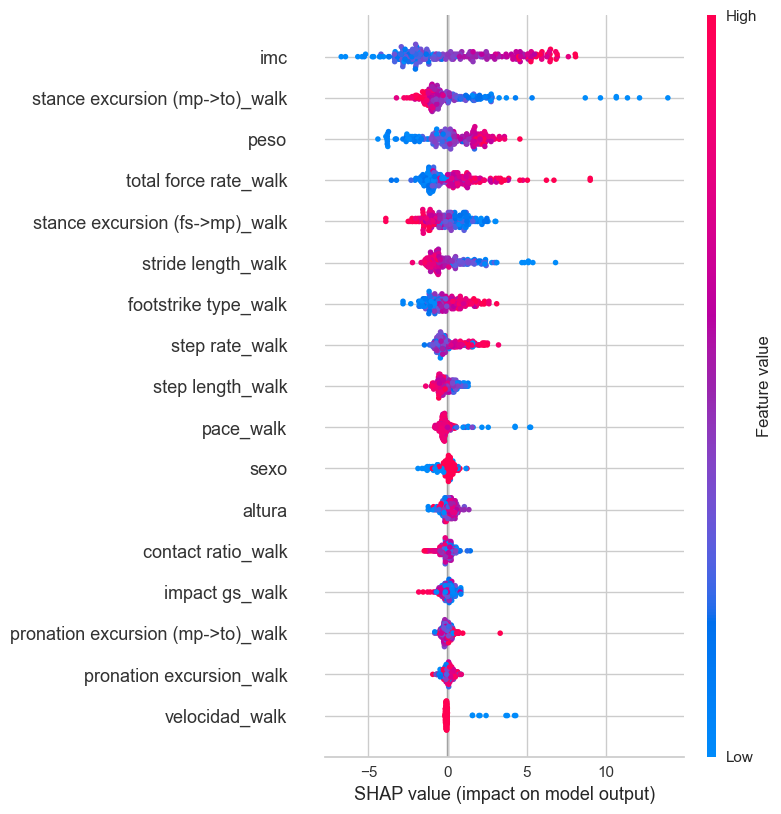

In [26]:
interpret_model(et)

Proporciona una visión más detallada de cómo cada característica contribuye a las predicciones del modelo. Los valores SHAP altos en rojo indican un impacto positivo en la predicción, mientras que los valores en azul indican un impacto negativo.

In [27]:
pred_holdouts = predict_model(et)
pred_holdouts.head()

sexo  altura  peso  pace_walk  velocidad_walk  step rate_walk  \
221     1     183  80.0   1.369794             5.0      100.110695   
421     0     160  58.0   1.383435             5.0      121.703499   
637     1     187  80.0   1.378343             5.0      102.821175   
641     1     173  93.0   1.382228             5.0      116.821167   
336     0     168  72.0   1.378090             5.0      119.250023   

     stride length_walk  shock_walk  impact gs_walk  braking gs_walk  ...  \
221              1.6376    1.400971        0.907010         1.034359  ...   
421              1.3641    2.809687        1.786143         2.122265  ...   
637              1.6217    1.323230        1.075733         0.735767  ...   
641              1.4182    1.937607        1.276474         1.411072  ...   
336              1.3886    2.992953        2.024507         2.196171  ...   

     pronation excursion_walk  contact ratio_walk  total force rate_walk  \
221                 -5.131702           62.879509              32.683510   
421                 -8.684649           62.736145              15.499695   
637                -16.563437           60.509689              19.752890   
641                 -1.634171           65.325462              12.597550   
336                 -9.065692           61.962463              34.322460   

     step length_walk  pronation excursion (mp->to)_walk  \
221            0.8188                           4.772017   
421            0.6821                           0.672912   
637            0.8109                           0.663300   
641            0.7091                           4.597264   
336            0.6943                          -6.855934   

     stance excursion (fs->mp)_walk  stance excursion (mp->to)_walk  \
221                       19.983431                       82.048805   
421                       21.669538                       65.181786   
637                       25.004606                       52.429550   
641                       19.320871                       62.338638   
336                       11.283381                       55.317280   

           imc  edad  prediction_label  
221  23.889999    36             35.50  
421  22.660000    49             33.64  
637  22.879999    29             29.00  
641  31.070000    56             56.00  
336  25.510000    67             51.52  

[5 rows x 21 columns]

**Consideraciones**

- Revisar y ajustar hiperparámetros para reducir el sobreajuste, posiblemente explorando valores más bajos para *max_depth* y aumentando *min_samples_split*. El ajuste de hiperparámetros y la experimentación con diferentes configuraciones o tipos de modelos serán esenciales para mejorar la robustez y la precisión de tus predicciones.
- Comparar valores predichos con valores reales.
- Experimentar con más modelos que manejen mejor la variabilidad y no linealidad de los datos, como Gradient Boosting o modelos más complejos de ensamble. Los modelos anteriores muestran un comportamiento de sobreajuste y una capacidad limitada para generalizar.

# Modelado

## 1. Lasso

### Datos escalados con `StandardScaler`

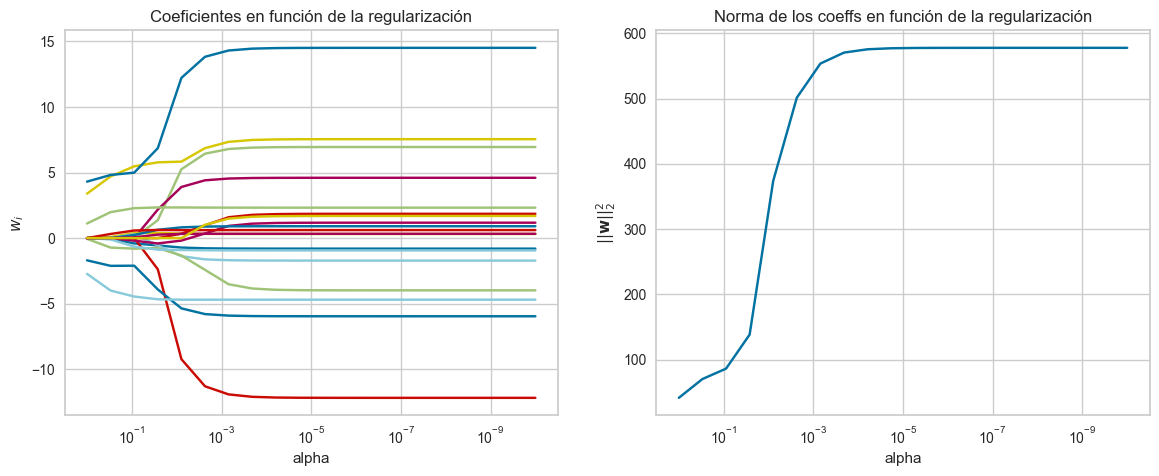

In [28]:
plot_lasso_paths(X_train_ss, y_train)

Best parameters: {'alpha': 0.4216965034285822}


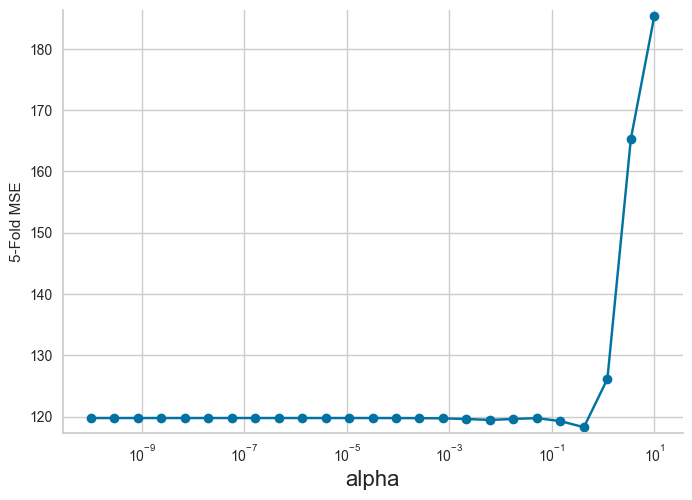

In [29]:
best_alpha = optimize_alpha(X_train_ss, y_train)

Características para eliminar: ['sexo', 'altura', 'peso', 'pace_walk', 'velocidad_walk', 'step rate_walk', 'impact gs_walk', 'pronation excursion_walk', 'contact ratio_walk', 'pronation excursion (mp->to)_walk', 'stance excursion (fs->mp)_walk']

Train: 0.3794418947466843
Test: 0.3633767005009608 

MAE: 8.5850
MSE: 112.5500
RMSE: 10.6090
R2: 0.3630


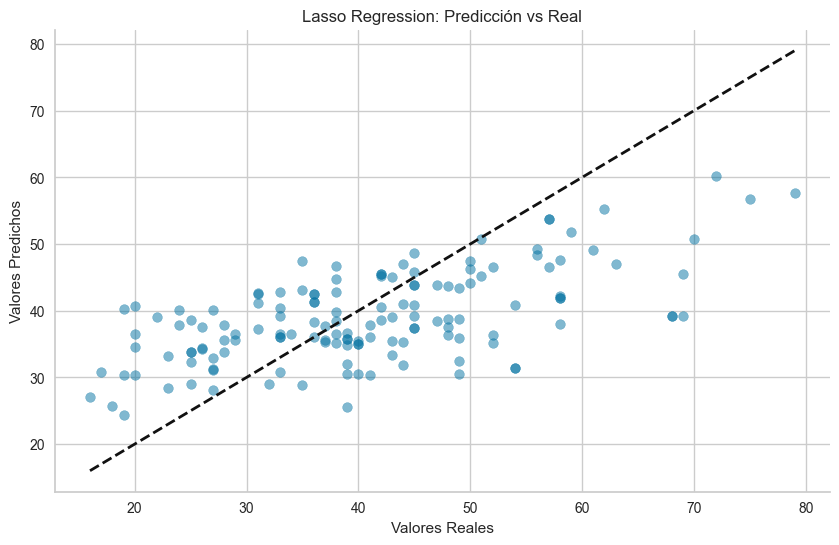

{'MAE': 8.585, 'MSE': 112.55, 'RMSE': 10.609, 'R2': 0.363}

In [30]:
lasso1 = Lasso(alpha=best_alpha)  # Reemplazar con el valor de alpha anterior
lasso1.fit(X_train_ss, y_train)
lasso_coefs = lasso1.coef_ # Obtener los coeficientes

# Identificar las características que el modelo Lasso ha reducido a cero
features_to_remove = [feature for feature, coef in zip(X_train_ss.columns, lasso_coefs) if coef == 0]
print("Características para eliminar:", features_to_remove)
print(f"\nTrain: {lasso1.score(X_train_ss,y_train)}")
print(f"Test: {lasso1.score(X_test_ss,y_test)} \n")

evaluate_model_reg(lasso1, X_test_ss, y_test, title='Lasso Regression')

### Datos escalados con `StandardScaler` y Selección de Características

Características para eliminar: []

Train: 0.3794428817046889
Test: 0.3634014243931055 

MAE: 8.5850
MSE: 112.5450
RMSE: 10.6090
R2: 0.3630


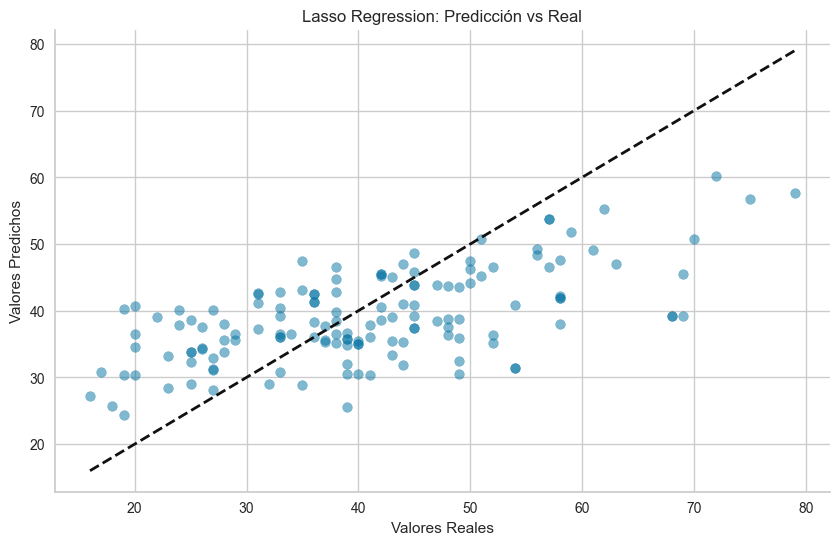

{'MAE': 8.585, 'MSE': 112.545, 'RMSE': 10.609, 'R2': 0.363}

In [31]:
selected_cols = ['stride length_walk', 'shock_walk', 'footstrike type_walk', 'total force rate_walk',
                 'step length_walk', 'stance excursion (mp->to)_walk', 'imc']

lasso1b = Lasso(alpha=best_alpha)  # Reemplazar con el valor de alpha anterior
lasso1b.fit(X_train_ss[selected_cols], y_train)
lasso_coefs = lasso1b.coef_  # Obtener los coeficientes

# Identificar las características que el modelo Lasso ha reducido a cero
features_to_remove = [feature for feature, coef in zip(X_train_ss[selected_cols].columns, lasso_coefs) if coef == 0]

print("Características para eliminar:", features_to_remove)
print(f"\nTrain: {lasso1b.score(X_train_ss[selected_cols],y_train)}")
print(f"Test: {lasso1b.score(X_test_ss[selected_cols],y_test)} \n")

evaluate_model_reg(lasso1b, X_test_ss[selected_cols], y_test, title='Lasso Regression')

### Datos escalados con `MinMaxScaler`

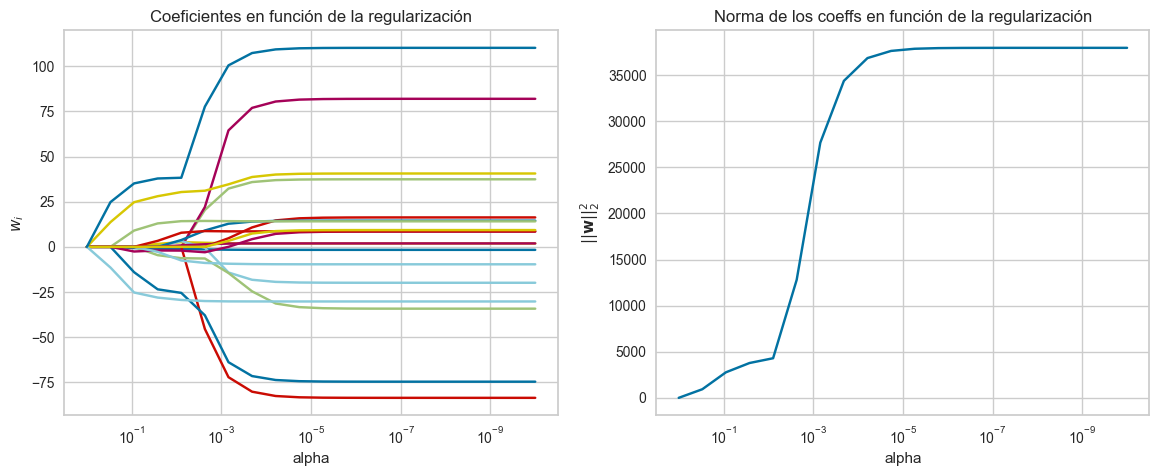

In [32]:
plot_lasso_paths(X_train_mm, y_train)

Best parameters: {'alpha': 0.051089697745069135}


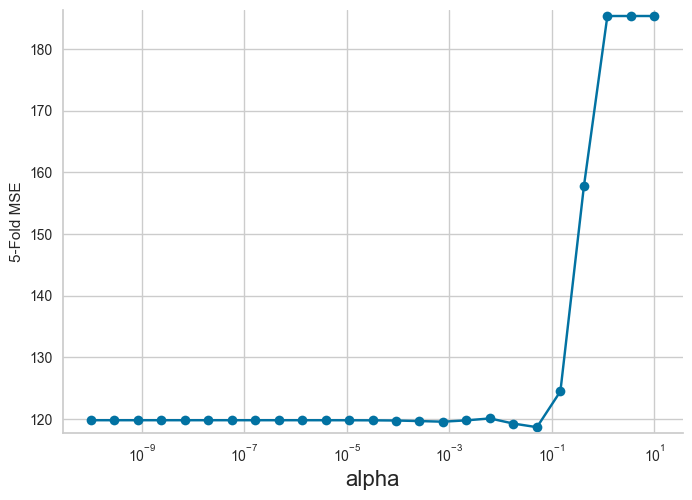

In [33]:
best_alpha_2 = optimize_alpha(X_train_mm, y_train)

Características para eliminar: ['altura', 'peso', 'pace_walk', 'step rate_walk', 'impact gs_walk', 'pronation excursion_walk', 'contact ratio_walk', 'step length_walk', 'pronation excursion (mp->to)_walk', 'stance excursion (fs->mp)_walk']

Train: 0.3806400868768145
Test: 0.3635522804988004 

MAE: 8.5430
MSE: 112.5190
RMSE: 10.6070
R2: 0.3640


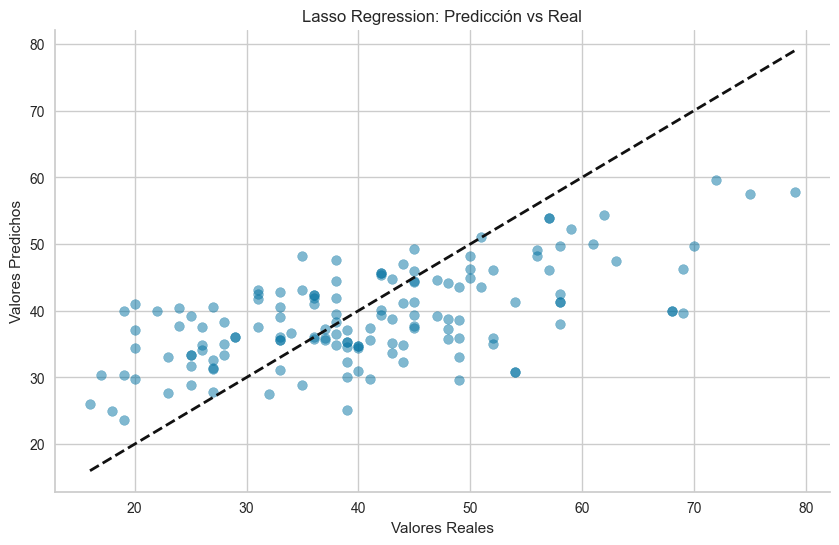

{'MAE': 8.543, 'MSE': 112.519, 'RMSE': 10.607, 'R2': 0.364}

In [34]:
lasso2 = Lasso(alpha=best_alpha_2)  # Reemplazar con el valor de alpha anterior
lasso2.fit(X_train_mm, y_train)
lasso_coefs = lasso2.coef_  # Obtener los coeficientes

# Identificar las características que el modelo Lasso ha reducido a cero
features_to_remove = [feature for feature, coef in zip(X_train_mm.columns, lasso_coefs) if coef == 0]
print("Características para eliminar:", features_to_remove)
print(f"\nTrain: {lasso2.score(X_train_mm,y_train)}")
print(f"Test: {lasso2.score(X_test_mm,y_test)} \n")

evaluate_model_reg(lasso2, X_test_mm, y_test, title='Lasso Regression')

### Datos escalados con `MinMaxScaler` y Selección de Características

Características para eliminar: []

Train: 0.38063707843288175
Test: 0.3635349451510995 

MAE: 8.5430
MSE: 112.5220
RMSE: 10.6080
R2: 0.3640


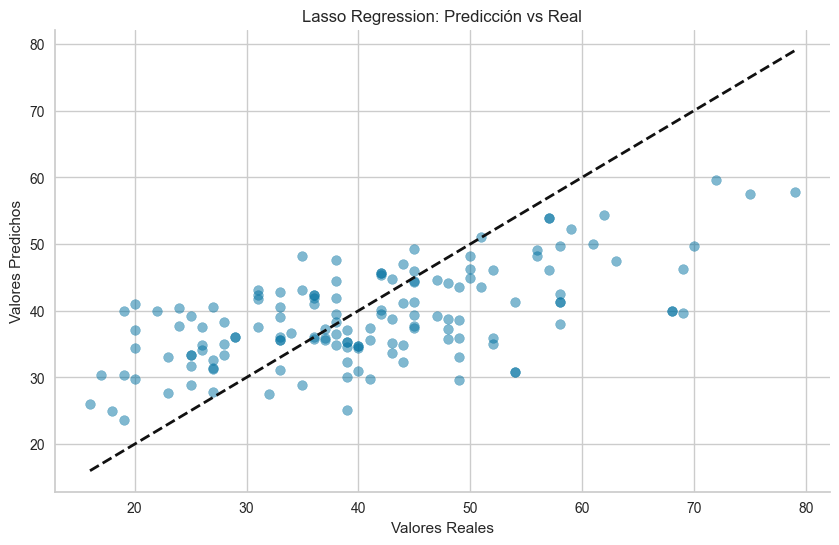

{'MAE': 8.543, 'MSE': 112.522, 'RMSE': 10.608, 'R2': 0.364}

In [35]:
selected_cols = ['sexo', 'velocidad_walk', 'stride length_walk', 'shock_walk', 'braking gs_walk',
                 'footstrike type_walk', 'total force rate_walk', 'stance excursion (mp->to)_walk', 'imc']

lasso2b = Lasso(alpha=best_alpha_2)  # Reemplazar con el valor de alpha anterior
lasso2b.fit(X_train_mm[selected_cols], y_train)
lasso_coefs = lasso2b.coef_ # Obtener los coeficientes

# Identificar las características que el modelo Lasso ha reducido a cero
features_to_remove = [feature for feature, coef in zip(X_train_mm[selected_cols].columns, lasso_coefs) if coef == 0]

print("Características para eliminar:", features_to_remove)
print(f"\nTrain: {lasso2b.score(X_train_mm[selected_cols],y_train)}")
print(f"Test: {lasso2b.score(X_test_mm[selected_cols],y_test)} \n")

evaluate_model_reg(lasso2b, X_test_mm[selected_cols], y_test, title='Lasso Regression')

### Conclusiones

En esta etapa de evaluación de modelos Lasso con diferentes configuraciones de preprocesamiento y selección de características, se han obtenido resultados muy similares entre las cuatro configuraciones probadas. Los modelos entrenados presentaron una capacidad predictiva similar tanto en los conjuntos de entrenamiento como de prueba, con métricas de desempeño muy cercanas en términos de MAE, MSE, RMSE y R².

**Influencia del Escalado de Datos:** La comparación entre los modelos que utilizan `StandardScaler` (Modelo 1 y 2) y `MinMaxScaler` (Modelo 3 y 4) muestra una ligera mejora en las métricas de rendimiento con el uso de `MinMaxScaler`. Sin embargo, estas mejoras son mínimas, lo que sugiere que el método de escalado no tiene un impacto significativo en la capacidad predictiva del modelo Lasso para este conjunto de datos.

**Efecto de la Eliminación de Características:** Eliminar características basadas en su importancia en el primer y tercer modelo no alteró las métricas de rendimiento (Modelo 2 y 4 respectivamente). Esto indica que las características eliminadas no contribuyen significativamente a la capacidad predictiva del modelo, o que la penalización Lasso ya ha reducido efectivamente la influencia de estas características poco importantes en el modelo original.

**Estabilidad del Modelo Lasso:** Los valores consistentes de R² y las métricas de error en todos los modelos indican una estabilidad en la predicción del modelo Lasso, independientemente del preprocesamiento y la selección de características. Esto puede ser atribuido a la naturaleza de Lasso que incluye la selección de características como parte de su regularización.

Esta etapa ha demostrado que mientras Lasso es efectivo para simplificar el modelo y manejar la multicolinearidad, su capacidad para mejorar significativamente el rendimiento predictivo en este caso particular es limitada.

## 2. Linear Regression

MAE: 8.2880
MSE: 109.4670
RMSE: 10.4630
R2: 0.3810


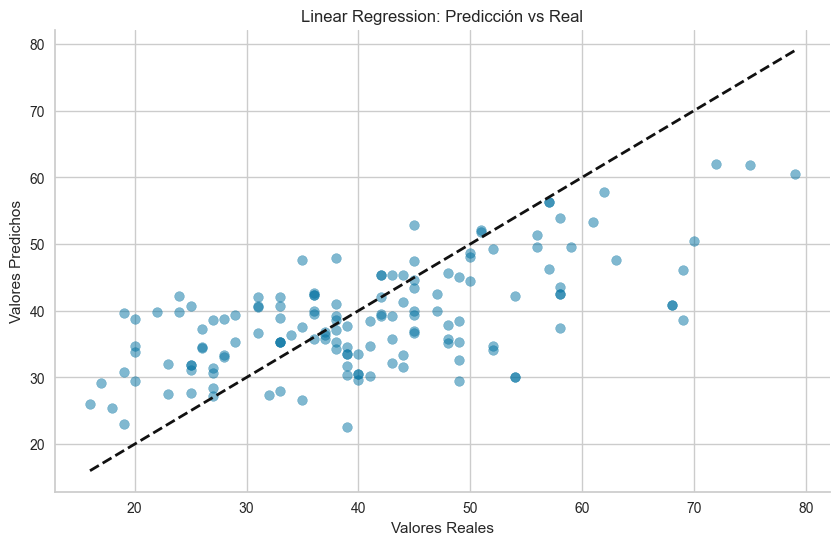


Intercepto (w0): -129.02682854020043
Coeficientes (w1, w2, ..., wn): [ -1.67835003   0.7978791   -0.94214152  30.22167656   1.86527573
  -0.24709852 -38.38619948  -4.58489387   2.78206354   1.86222887
   2.87275387  -0.18604814   0.47729808   0.30537522   1.12845495
   0.04421634   0.25082562  -0.4909435    4.3085196 ]

||w||_2^2 = 2.5e+03

Train:  0.402077359377493
Test:  0.3808139364678741


In [36]:
lr = LinearRegression().fit(X_train, y_train)
evaluate_model_reg(lr,X_test, y_test, title="Linear Regression")

# Mostrar los coeficientes del modelo
print('\nIntercepto (w0):', lr.intercept_)
print('Coeficientes (w1, w2, ..., wn):', lr.coef_)

# Calcular la norma L2 al cuadrado de los coeficientes (sin incluir el intercepto)
norm_w2 = np.dot(lr.coef_,lr.coef_.T) 
print(f'\n||w||_2^2 = {norm_w2:.2g}\n')
print("Train: ",lr.score(X_train,y_train))
print("Test: ",lr.score(X_test,y_test))

In [37]:
# Comparación de valores reales y predichos
y_pred = lr.predict(X_test)
print("\nComparación de valores reales y predichos:")
for real, pred in zip(y_test[:10], y_pred[:10]):
    print(f'Real: {real}, Predicho: {pred}')


Comparación de valores reales y predichos:
Real: 29, Predicho: 39.35740861411634
Real: 35, Predicho: 26.61256664323841
Real: 35, Predicho: 37.599001640528144
Real: 29, Predicho: 35.24587752070104
Real: 27, Predicho: 38.58743230123858
Real: 75, Predicho: 61.813490146557115
Real: 59, Predicho: 49.5153959138251
Real: 27, Predicho: 30.7298046671863
Real: 61, Predicho: 53.26139588487476
Real: 19, Predicho: 30.746992253469074


### Linear Regression con los Datos Escalados

MAE: 8.2880
MSE: 109.4670
RMSE: 10.4630
R2: 0.3810


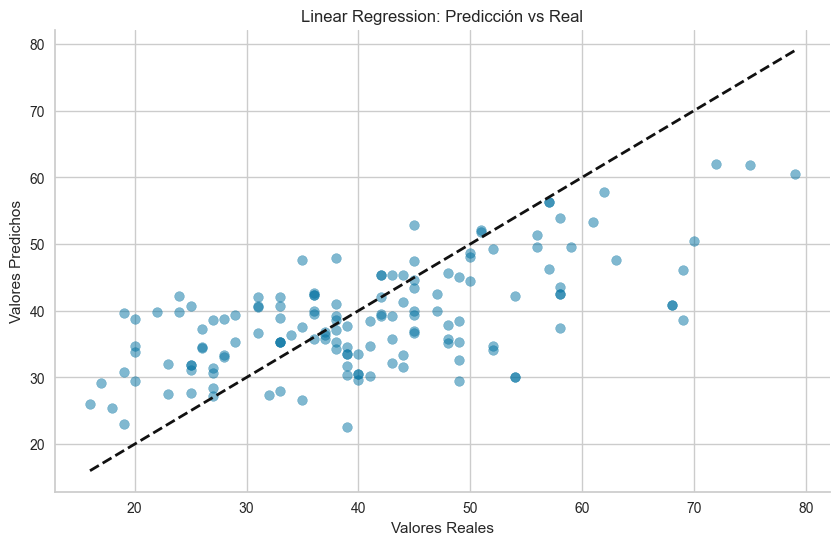


Intercepto (w0): 38.537521815008716
Coeficientes (w1, w2, ..., wn): [ -0.80450502   6.96665456 -12.21843901   4.59638557   0.31652176
  -1.71493662  -5.95941152  -4.04466136   1.88531393   1.20570479
   7.55487196  -0.94395407   0.90458538   2.32022711   0.61038676
   0.32659767   1.69800764  -4.69795639  14.53722766]

||w||_2^2 = 5.8e+02

Train:  0.4020773593774932
Test:  0.38081393646787465


In [38]:
lr2 = LinearRegression().fit(X_train_ss, y_train)
evaluate_model_reg(lr2,X_test_ss, y_test, title="Linear Regression")

# Mostrar los coeficientes del modelo
print('\nIntercepto (w0):', lr2.intercept_)
print('Coeficientes (w1, w2, ..., wn):', lr2.coef_)

# Calcular la norma L2 al cuadrado de los coeficientes (sin incluir el intercepto)
norm_w2 = np.dot(lr2.coef_,lr2.coef_.T) 
print(f'\n||w||_2^2 = {norm_w2:.2g}\n')
print("Train: ",lr2.score(X_train_ss,y_train))
print("Test: ",lr2.score(X_test_ss,y_test))

In [39]:
# Comparación de valores reales y predichos
y_pred = lr2.predict(X_test_ss)
print("\nComparación de valores reales y predichos:")
for real, pred in zip(y_test[:10], y_pred[:10]):
    print(f'Real: {real}, Predicho: {pred}')


Comparación de valores reales y predichos:
Real: 29, Predicho: 39.357408614116366
Real: 35, Predicho: 26.612566643238395
Real: 35, Predicho: 37.59900164052791
Real: 29, Predicho: 35.24587752070107
Real: 27, Predicho: 38.58743230123869
Real: 75, Predicho: 61.813490146557065
Real: 59, Predicho: 49.51539591382518
Real: 27, Predicho: 30.72980466718637
Real: 61, Predicho: 53.26139588487483
Real: 19, Predicho: 30.74699225346908


MAE: 8.2880
MSE: 109.4670
RMSE: 10.4630
R2: 0.3810


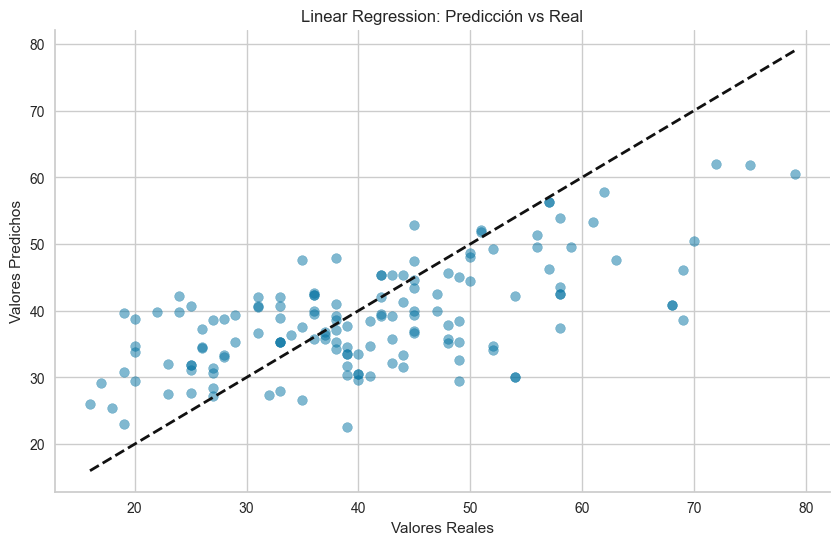


Intercepto (w0): 13.26835975913934
Coeficientes (w1, w2, ..., wn): [ -1.67835003  37.50031792 -83.85059524  81.90693282   1.86527573
 -19.87737287 -74.63236834 -34.74974713  16.57451111   8.65867145
  40.65954712  -9.67183368  14.49124676  14.11228779   8.60266344
   1.88747415   9.34017648 -30.2527185  110.38427205]

||w||_2^2 = 3.8e+04

Train:  0.4020773593774931
Test:  0.380813936467874


In [40]:
lr3 = LinearRegression().fit(X_train_mm, y_train)
evaluate_model_reg(lr3,X_test_mm, y_test, title="Linear Regression")

# Mostrar los coeficientes del modelo
print('\nIntercepto (w0):', lr3.intercept_)
print('Coeficientes (w1, w2, ..., wn):', lr3.coef_)

# Calcular la norma L2 al cuadrado de los coeficientes (sin incluir el intercepto)
norm_w2 = np.dot(lr3.coef_,lr3.coef_.T) 
print(f'\n||w||_2^2 = {norm_w2:.2g}\n')
print("Train: ",lr3.score(X_train_mm,y_train))
print("Test: ",lr3.score(X_test_mm,y_test))

In [41]:
# Comparación de valores reales y predichos
y_pred = lr3.predict(X_test_mm)
print("\nComparación de valores reales y predichos:")
for real, pred in zip(y_test[:10], y_pred[:10]):
    print(f'Real: {real}, Predicho: {pred}')


Comparación de valores reales y predichos:
Real: 29, Predicho: 39.35740861411636
Real: 35, Predicho: 26.61256664323838
Real: 35, Predicho: 37.59900164052793
Real: 29, Predicho: 35.245877520701086
Real: 27, Predicho: 38.58743230123872
Real: 75, Predicho: 61.81349014655707
Real: 59, Predicho: 49.51539591382526
Real: 27, Predicho: 30.729804667186357
Real: 61, Predicho: 53.26139588487483
Real: 19, Predicho: 30.74699225346905


### Conclusiones

En las pruebas realizadas con el modelo de **regresión lineal** aplicando diferentes métodos de escalado, se observa que las métricas de rendimiento (MAE, MSE, RMSE, R2) son consistentes a través de los tres modelos, indicando que el **método de escalado no tiene un impacto significativo en el rendimiento predictivo** del modelo para este conjunto de datos.

Sin embargo, los **valores de los coeficientes y sus normas L2 al cuadrado varían considerablemente**, reflejando cambios en la magnitud de los coeficientes que **dependen del tipo de escalado** aplicado. Esto sugiere que, aunque el escalado no altera la calidad de la predicción del modelo, sí afecta la escala y la interpretación de los coeficientes del modelo.

Aunque el modelo logra cierta aproximación a los valores reales, hay una variabilidad considerable en la precisión de las predicciones. Algunas predicciones están bastante alejadas de los valores reales, especialmente en casos donde la edad real es más alta.

## 3. Árbol de Decisión *(DecisionTreeRegressor)*

Fitting 5 folds for each of 171 candidates, totalling 855 fits
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=1, min_sam

[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] EN

[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] 

[CV] END max_depth=9, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END 

[CV] END max_depth=11, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=4, min_samples_split=20; total time=   

[CV] END max_depth=13, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=10, min_samples_split=20; total

[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=16, min_samples_leaf=4, min_samples_split=2; total time=  

[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=2; total t

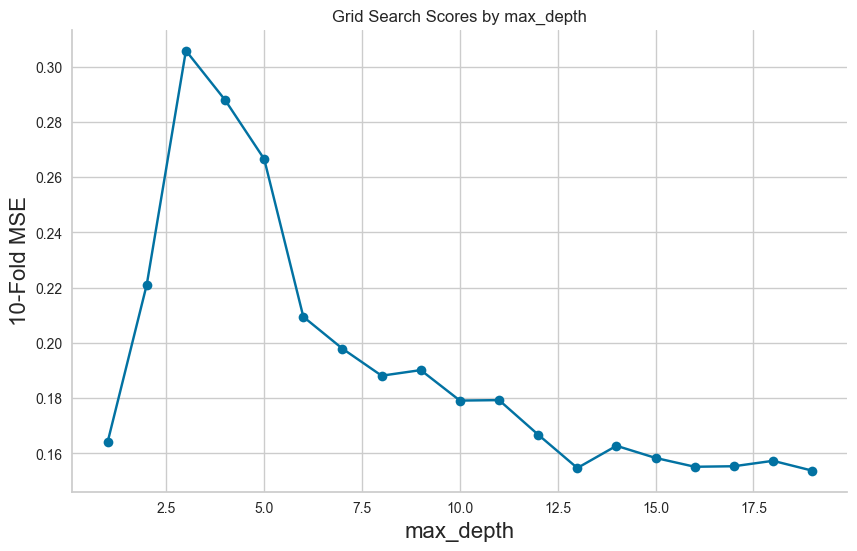

In [42]:
dt_param_grid = {
    'max_depth': range(1, 20),
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 4, 10]
}

dt_model_1 = train_and_plot_model(DecisionTreeRegressor(random_state=0), dt_param_grid, X_train, y_train, cv=5)

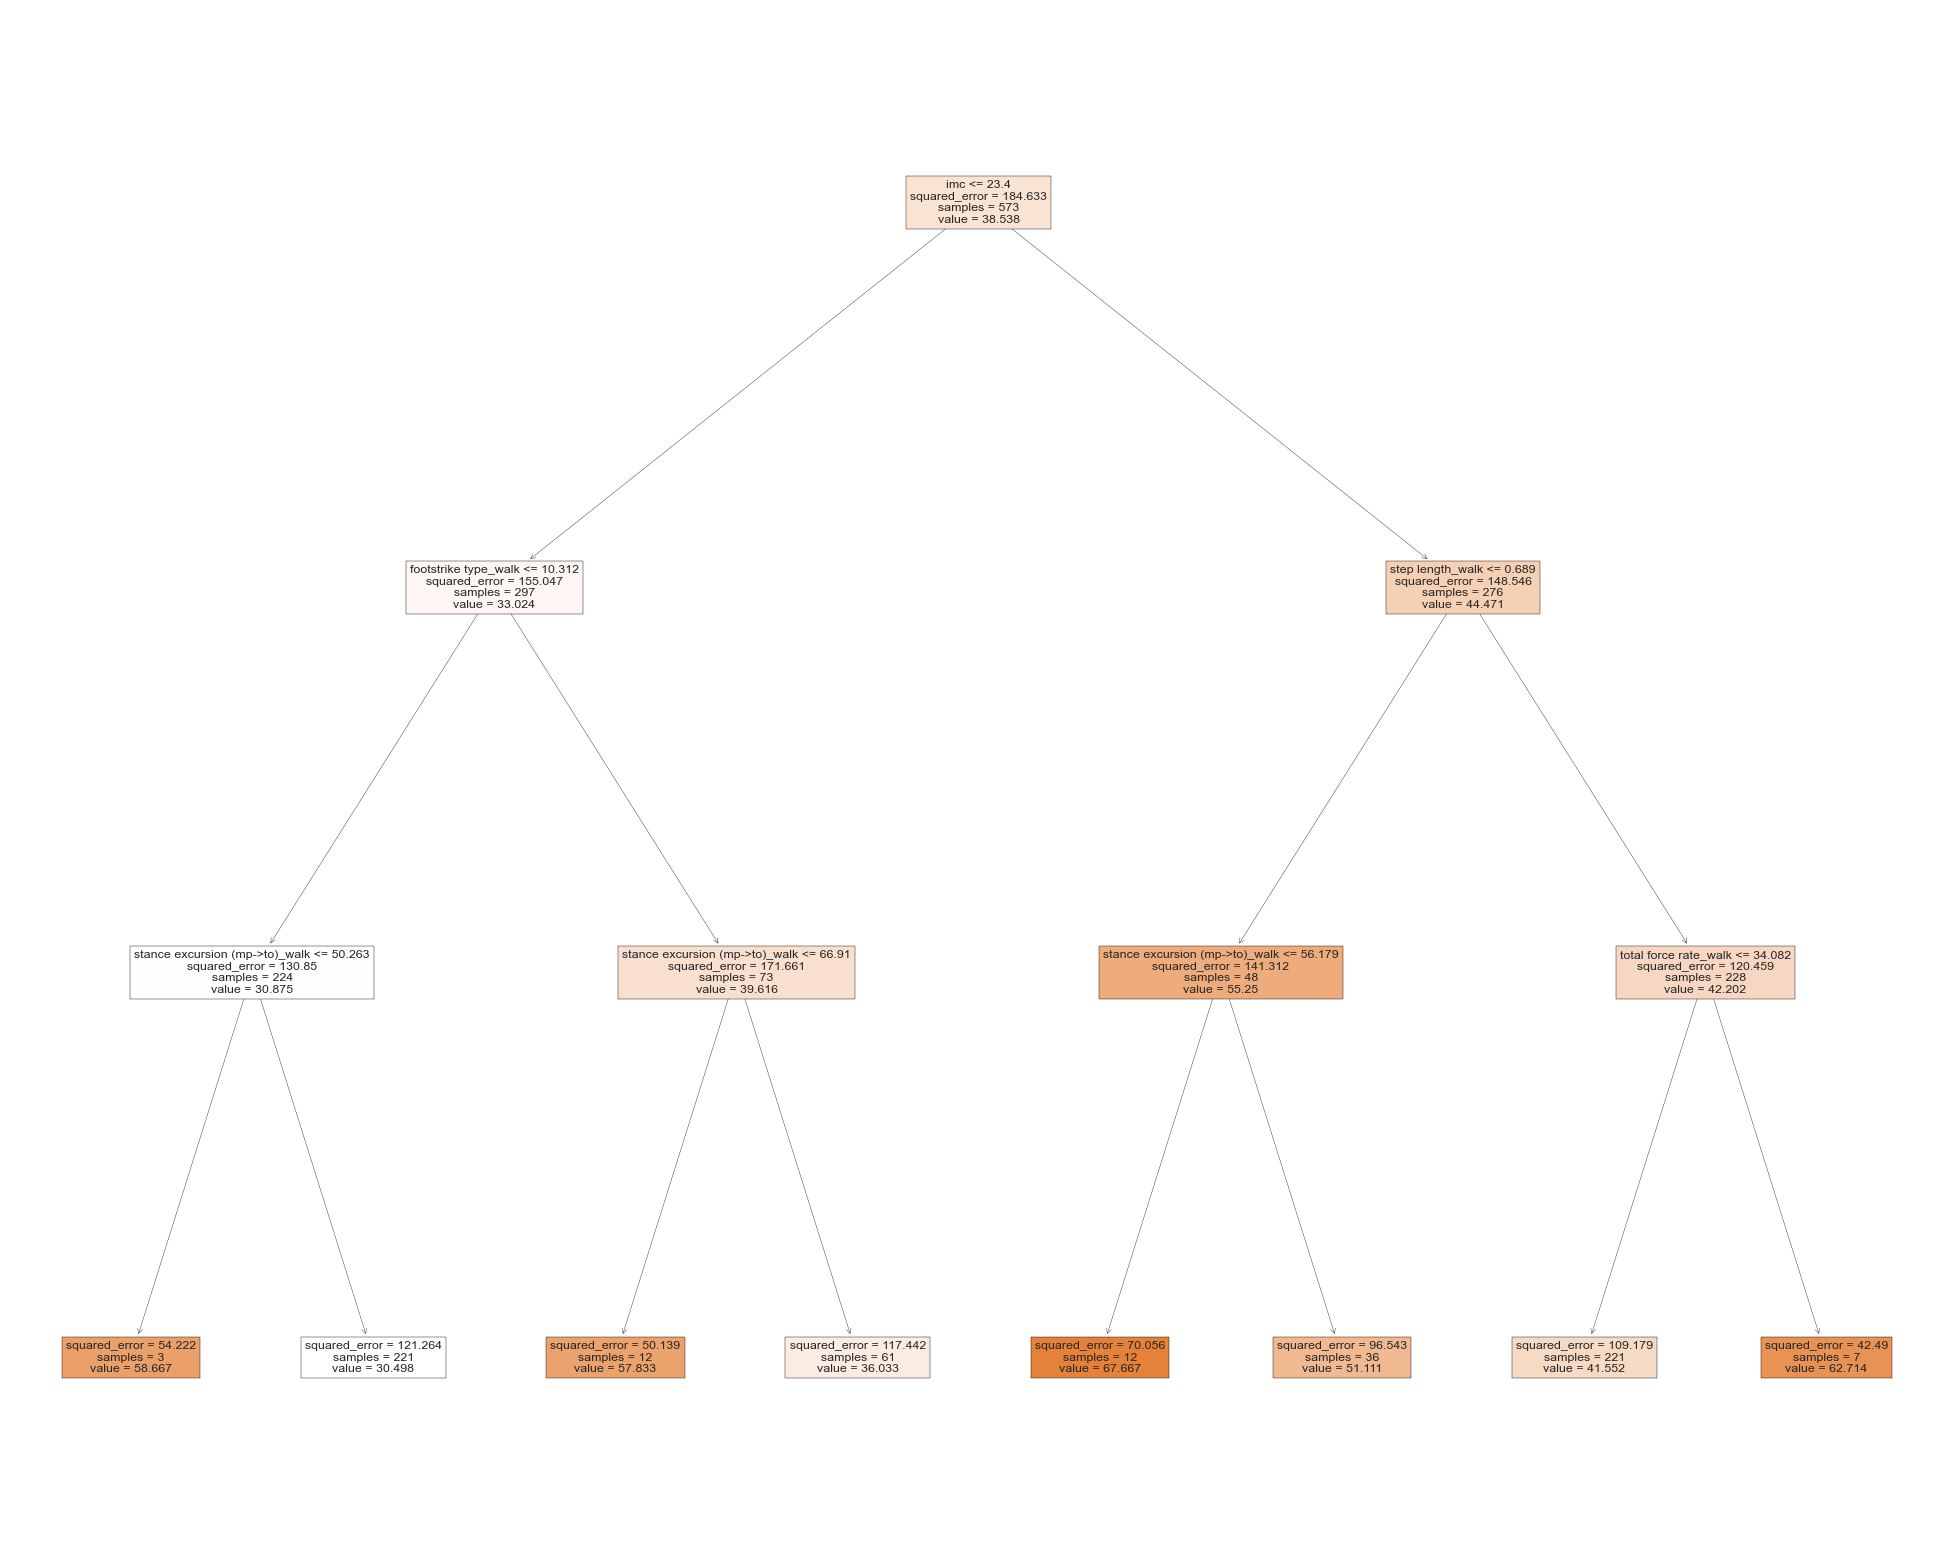

In [43]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_model_1, feature_names=list(X_train.columns), filled=True)

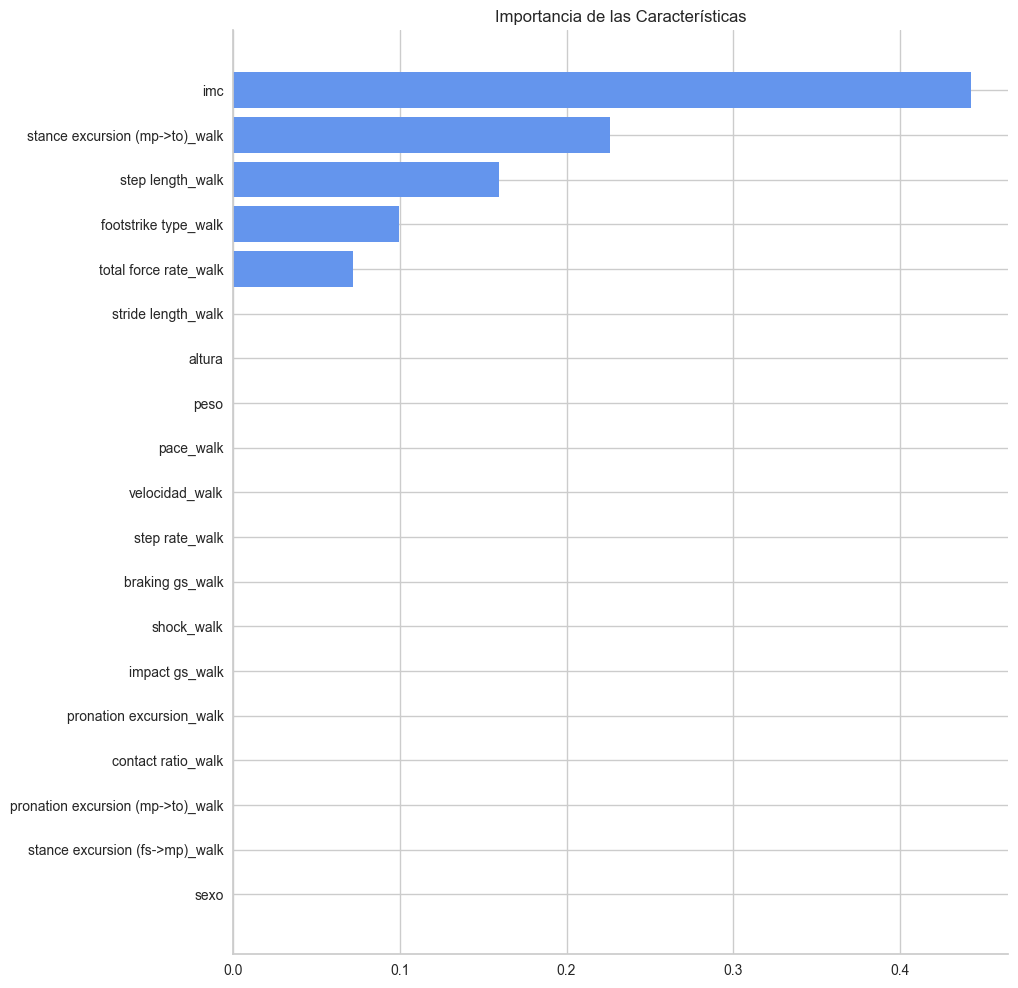

In [44]:
plot_feature_importance(dt_model_1, X_train.columns, figsize=(10,12))

In [45]:
print("Train: ",dt_model_1.score(X_train,y_train))
print("Test: ",dt_model_1.score(X_test,y_test))

Train:  0.40006471949444344
Test:  0.19060473974886327


MAE: 9.6310
MSE: 143.0940
RMSE: 11.9620
R2: 0.1910


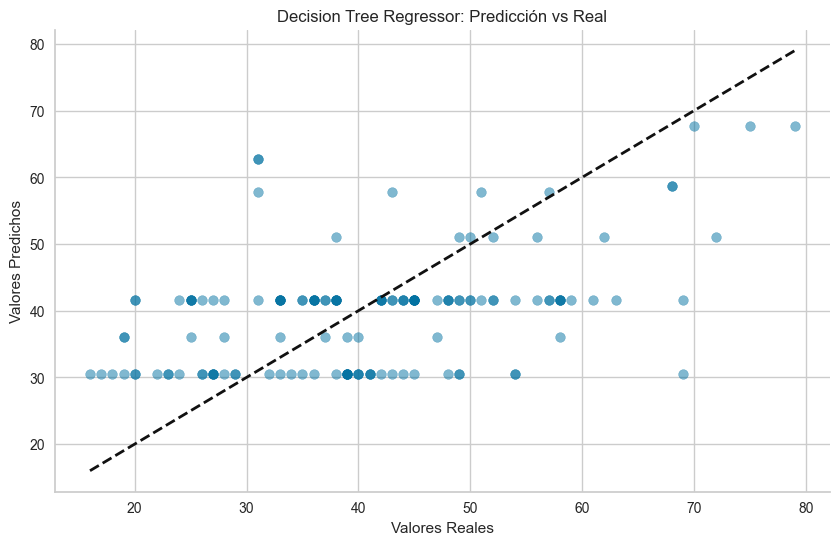

{'MAE': 9.631, 'MSE': 143.094, 'RMSE': 11.962, 'R2': 0.191}

In [46]:
evaluate_model_reg(dt_model_1,X_test, y_test, title="Decision Tree Regressor")

In [47]:
# Comparación de valores reales y predichos
y_pred = dt_model_1.predict(X_test)
print("\nComparación de valores reales y predichos:")
for real, pred in zip(y_test[:10], y_pred[:10]):
    print(f'Real: {real}, Predicho: {pred}')


Comparación de valores reales y predichos:
Real: 29, Predicho: 30.497737556561084
Real: 35, Predicho: 30.497737556561084
Real: 35, Predicho: 41.55203619909502
Real: 29, Predicho: 30.497737556561084
Real: 27, Predicho: 41.55203619909502
Real: 75, Predicho: 67.66666666666667
Real: 59, Predicho: 41.55203619909502
Real: 27, Predicho: 30.497737556561084
Real: 61, Predicho: 41.55203619909502
Real: 19, Predicho: 36.032786885245905


### Árbol de Decisión con Selección de Características

Fitting 5 folds for each of 171 candidates, totalling 855 fits
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=1, min_sam

[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[

[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] E

[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV

[CV] END max_depth=11, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=11, min_samples_leaf=4, min_samples_split=2; total time=   

[CV] END max_depth=13, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=13, min_samples_leaf=4, min_samples_split=20; total time=   0.

[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=20; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=2; total time=

[CV] END max_depth=17, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END max_depth=17, min_samples_leaf=10, min_samples_split=20; to

[CV] END max_depth=19, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END max_depth=19, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
Best mean cross-validation score: 0.326
Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}


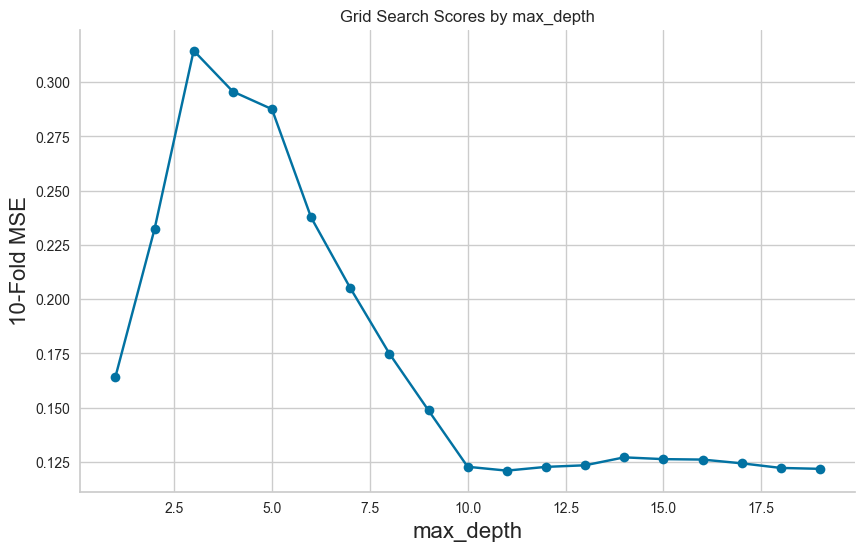

In [48]:
columns = ['peso', 'braking gs_walk', 'footstrike type_walk', 'contact ratio_walk', 'total force rate_walk',
           'step length_walk', 'stance excursion (mp->to)_walk','stride length_walk', 'imc']

dt_param_grid = {
    'max_depth': range(1, 20),
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 4, 10]
}

dt_model_2 = train_and_plot_model(DecisionTreeRegressor(random_state=0), dt_param_grid, X_train[columns], y_train, cv=5)

Train: 0.40006471949444344
Test: 0.19060473974886327

MAE: 9.6310
MSE: 143.0940
RMSE: 11.9620
R2: 0.1910


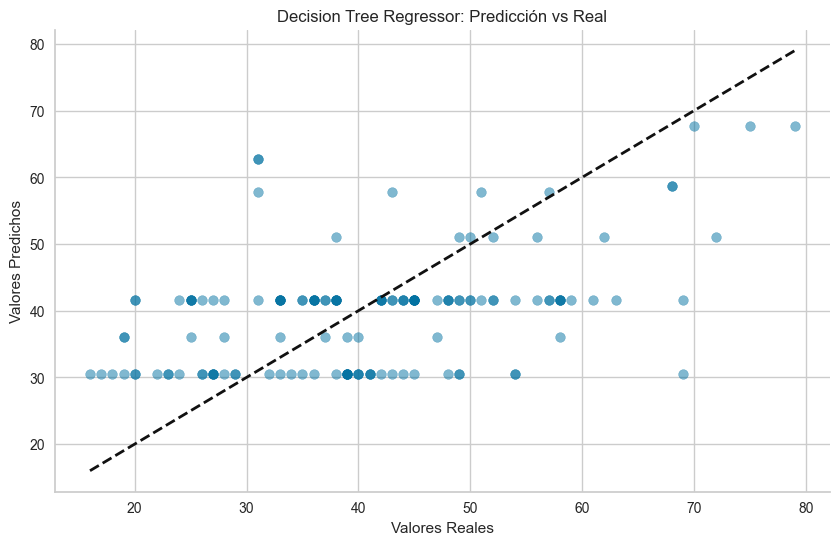

{'MAE': 9.631, 'MSE': 143.094, 'RMSE': 11.962, 'R2': 0.191}

In [49]:
print(f"Train: {dt_model_2.score(X_train[columns],y_train)}")
print(f"Test: {dt_model_2.score(X_test[columns],y_test)}\n")

evaluate_model_reg(dt_model_2,X_test[columns], y_test, title="Decision Tree Regressor")

In [50]:
y_pred = dt_model_2.predict(X_test[columns])
print("Comparación de valores reales y predichos:")
for real, pred in zip(y_test[:10], y_pred[:10]):
    print(f'Real: {real}, Predicho: {pred}')

Comparación de valores reales y predichos:
Real: 29, Predicho: 30.497737556561084
Real: 35, Predicho: 30.497737556561084
Real: 35, Predicho: 41.55203619909502
Real: 29, Predicho: 30.497737556561084
Real: 27, Predicho: 41.55203619909502
Real: 75, Predicho: 67.66666666666667
Real: 59, Predicho: 41.55203619909502
Real: 27, Predicho: 30.497737556561084
Real: 61, Predicho: 41.55203619909502
Real: 19, Predicho: 36.032786885245905


### Conclusiones

El modelo de árbol de decisión ha demostrado tener un rendimiento limitado en el conjunto de datos proporcionado, como lo indican las métricas de evaluación y la comparación de los valores predichos frente a los reales. A pesar de implementar una selección de características más relevante y ajustar los parámetros del modelo, los resultados siguen siendo subóptimos, especialmente en el conjunto de prueba.

**Desempeño del Modelo**:
   - El modelo tiene un `R^2` de 0.206 en el conjunto de prueba, lo que sugiere que sólo puede explicar aproximadamente el 20.6% de la variabilidad en los datos objetivo. Esto es relativamente bajo, indicando una capacidad predictiva pobre.
   - Las métricas de error, incluyendo un MSE de 140.421 y un RMSE de 11.850, son altas, lo que confirma que las predicciones del modelo a menudo están lejos de los valores reales.

**Ajuste del Modelo**:
   - El modelo muestra un sobreajuste, como se evidencia por una puntuación significativamente más alta en el entrenamiento (`R^2` de 0.519) comparado con la prueba (`R^2` de 0.206). 

**Predicciones vs. Valores Reales**:
   - Las predicciones varían significativamente de los valores reales, con tendencias claras de subestimación o sobreestimación en varios casos. Por ejemplo, para un valor real de 75, el modelo predice aproximadamente 64.89, y para un valor real de 19, predice alrededor de 37.29, lo que muestra errores sustanciales en ambas direcciones.

El árbol de decisión probado requiere mejoras significativas o la consideración de alternativas más robustas para lograr una predicción precisa y confiable en este conjunto de datos. El enfoque actual muestra limitaciones claras en términos de precisión predictiva y generalización a datos no vistos.

## 4. Random Forest

Fitting 3 folds for each of 224 candidates, totalling 672 fits
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total t

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=2, max_features=log2, min_samp

[CV] END max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, max_features=sqrt, min_sam

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_sa

[CV] END max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=7, max_features=sqrt, min_

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=8, max_features=log2, min_

[CV] END max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=9, max_features=log2, min_sampl

[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=11, max_features=sq

[CV] END max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=13, max_features=sq

[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=14, max_features=sq

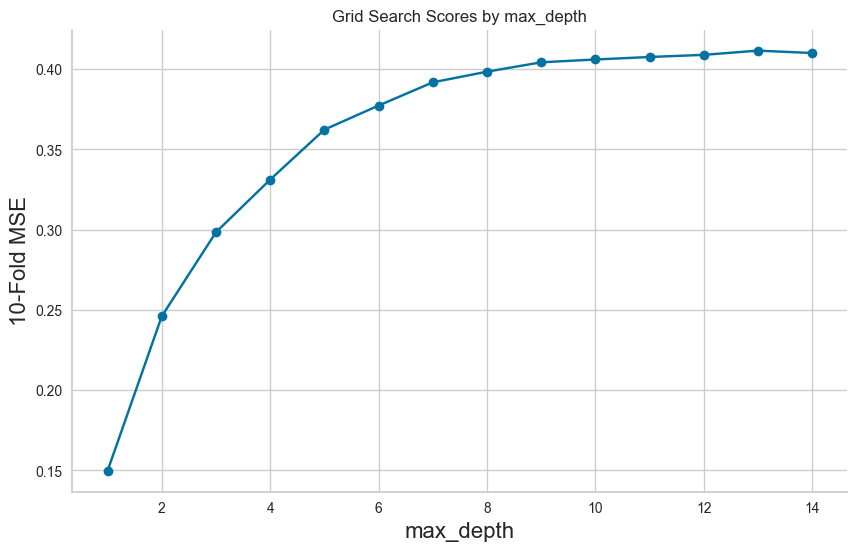

In [51]:
rf = RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt')

# Definir un grid de parámetros más complejo
rf_param_grid = {
    'max_depth': range(1, 15),
    'n_estimators': [50, 100], 
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
    'max_features': ['sqrt', 'log2']
}

rf_model_1 = train_and_plot_model(rf, rf_param_grid, X_train, y_train)

In [52]:
print("Train: ",rf_model_1.score(X_train,y_train))
print("Test: ",rf_model_1.score(X_test,y_test))

Train:  0.9149804713542204
Test:  0.47987250658194847


Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.1s
[CV] END ........................................max_depth=3; total time=   0.1s
[CV] END ........................................max_depth=3; total time=   0.1s
[CV] END ........................................max_depth=3; total time=   0.1s
[CV] END ........................................max_depth=4; total time=   0.1s
[CV] END ........................................max_depth=4; total time=   0.1s
[CV] END .......................................

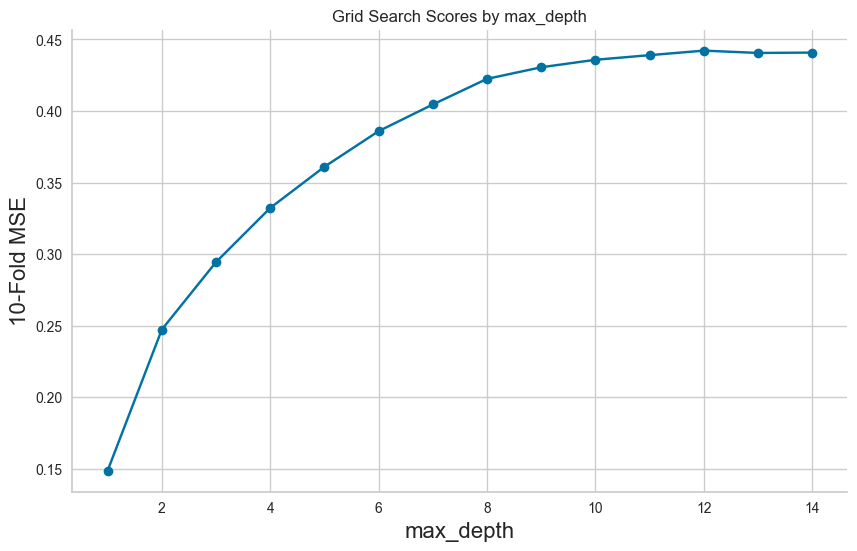

In [53]:
rf_param_grid = {'max_depth': range(1, 15)} # Grid de parámetros simple
rf_model_2 = train_and_plot_model(rf, rf_param_grid, X_train, y_train)

Cuando se utiliza un solo parámetro (`max_depth`) en el modelo de Random Forest, se observa un ligero aumento en la puntuación de validación cruzada comparado con el uso de múltiples parámetros (`max_depth`, `n_estimators`, `min_samples_split`, `min_samples_leaf`, `max_features`). Este fenómeno puede deberse a la complejidad adicional y las interacciones entre múltiples parámetros que no necesariamente se traducen en mejoras lineales del rendimiento. Las combinaciones adicionales pueden introducir sobreajuste en el grid search o no captar adecuadamente las sinergias entre los parámetros, especialmente en un conjunto de datos con características particulares.

Train: 0.9033705451187493
Test: 0.49033077147973125

MAE: 7.1980
MSE: 90.1050
RMSE: 9.4920
R2: 0.4900


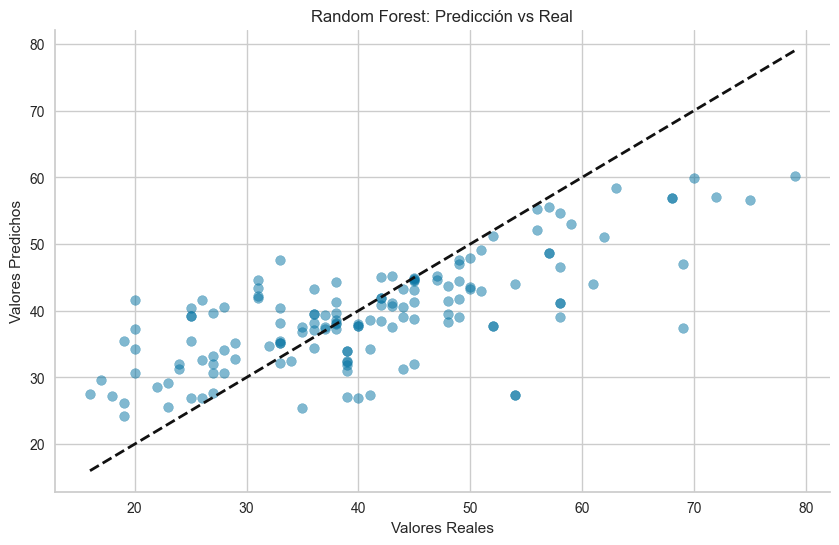

{'MAE': 7.198, 'MSE': 90.105, 'RMSE': 9.492, 'R2': 0.49}

In [54]:
print(f"Train: {rf_model_2.score(X_train,y_train)}")
print(f"Test: {rf_model_2.score(X_test,y_test)}\n")

evaluate_model_reg(rf_model_2,X_test, y_test, title="Random Forest")

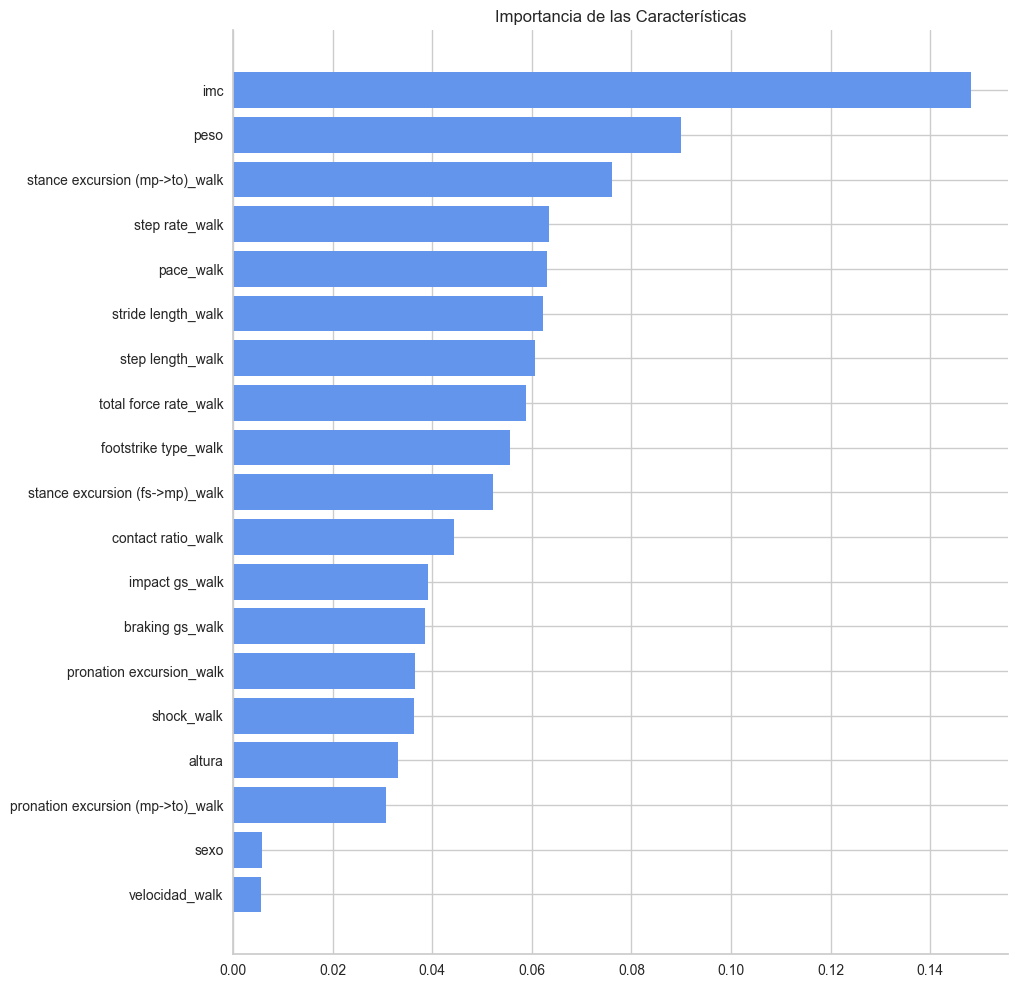

In [55]:
plot_feature_importance(rf_model_2, X_train.columns, figsize=(10,12))

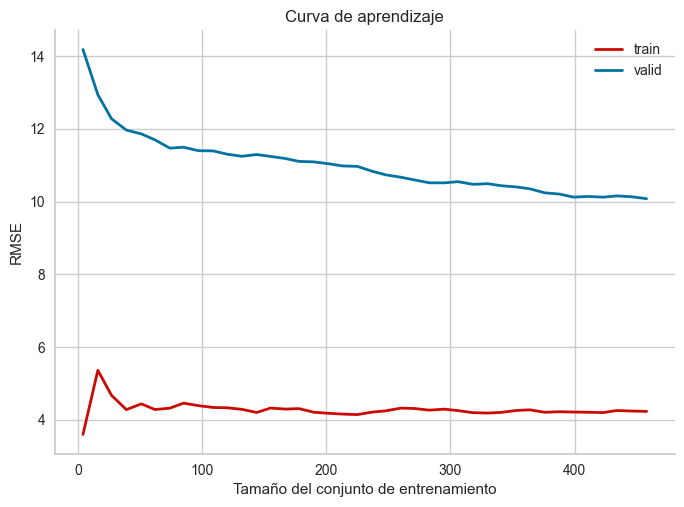

In [56]:
# Curva de Aprendizaje
train_sizes, train_scores, valid_scores = learning_curve(
    rf_model_2, X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=2, label="valid")
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.title('Curva de aprendizaje')
plt.legend()
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

La curva de aprendizaje y las métricas asociadas indican que el modelo de Random Forest, antes de la selección de características, muestra un **sobreajuste significativo,** con un excelente rendimiento en el conjunto de entrenamiento pero un rendimiento más modesto en el conjunto de prueba. Este comportamiento sugiere la **necesidad de ajustar la complejidad del modelo** o de implementar métodos para mejorar la generalización, como la selección de características o el ajuste de parámetros.

### Random Forest con Selección de Características

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.1s
[CV] END .....................................

[CV] END .......................................max_depth=11; total time=   0.1s
[CV] END .......................................max_depth=11; total time=   0.1s
[CV] END .......................................max_depth=11; total time=   0.1s
[CV] END .......................................max_depth=11; total time=   0.1s
[CV] END .......................................max_depth=11; total time=   0.1s
[CV] END .......................................max_depth=11; total time=   0.1s
[CV] END .......................................max_depth=11; total time=   0.1s
[CV] END .......................................max_depth=11; total time=   0.1s
[CV] END .......................................max_depth=12; total time=   0.1s
[CV] END .......................................max_depth=12; total time=   0.1s
[CV] END .......................................max_depth=12; total time=   0.1s
[CV] END .......................................max_depth=12; total time=   0.1s
[CV] END ...................

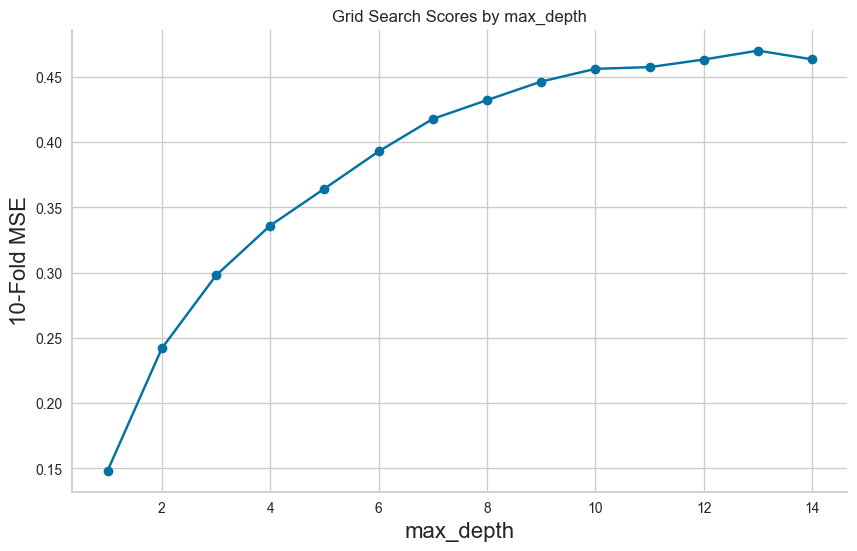

In [57]:
columns = ['peso', 'pace_walk', 'step rate_walk', 'stride length_walk',
           'footstrike type_walk', 'total force rate_walk', 'step length_walk',
           'stance excursion (fs->mp)_walk', 'stance excursion (mp->to)_walk', 'imc']

rf = RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt')
rf_param_grid = {'max_depth': range(1, 15)}
rf_model_3 = train_and_plot_model(rf, rf_param_grid, X_train[columns], y_train, cv=10)

Train: 0.911420142647305
Test: 0.5095984277504668

MAE: 7.1250
MSE: 86.6990
RMSE: 9.3110
R2: 0.5100


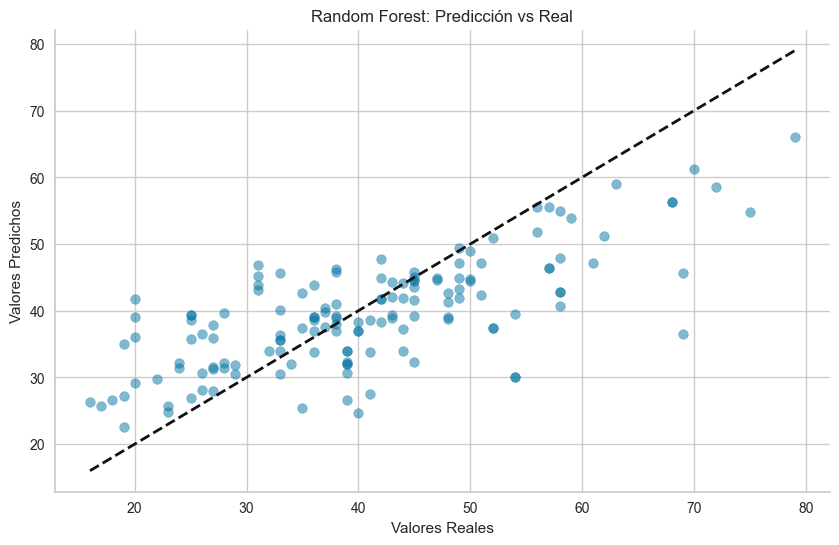

{'MAE': 7.125, 'MSE': 86.699, 'RMSE': 9.311, 'R2': 0.51}

In [58]:
print(f"Train: {rf_model_3.score(X_train[columns],y_train)}")
print(f"Test: {rf_model_3.score(X_test[columns],y_test)}\n")
evaluate_model_reg(rf_model_3,X_test[columns], y_test, title="Random Forest")

In [59]:
y_pred = rf_model_3.predict(X_test[columns])
print("Comparación de valores reales y predichos:")
for real, pred in zip(y_test[:10], y_pred[:10]):
    print(f'Real: {real}, Predicho: {pred}')

Comparación de valores reales y predichos:
Real: 29, Predicho: 30.496489381595502
Real: 35, Predicho: 25.388893628358034
Real: 35, Predicho: 42.654107643704776
Real: 29, Predicho: 31.797660492371406
Real: 27, Predicho: 37.88986021448361
Real: 75, Predicho: 54.769285714285715
Real: 59, Predicho: 53.94236103335079
Real: 27, Predicho: 35.94084556985883
Real: 61, Predicho: 47.10459560337143
Real: 19, Predicho: 34.96987349529126


### Conclusiones

La **selección de características** ha resultado en un modelo de Random Forest más eficiente y efectivo, demostrando una mejor capacidad predictiva y precisión. El modelo ahora no solo es más simple y se entrena más rápidamente, sino que también muestra una mejoría en todos los aspectos de su rendimiento evaluado mediante métricas estándar. A pesar de las mejoras, continúan existiendo áreas de oportunidad para optimizar aún más el rendimiento.

## 5. Gradient Boosting Regressor

Fitting 3 folds for each of 224 candidates, totalling 672 fits
[CV] END learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=200,

[CV] END learning_rate=0.01, max_depth=7, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=7, min_samples_split=2, n_estimators=200,

[CV] END learning_rate=0.01, max_depth=10, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=2, n_estima

[CV] END learning_rate=0.01, max_depth=13, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=13, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=13, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=13, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=13, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=13, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=13, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=13, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=13, min_samples_split=2, n_estima

[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=200, subsampl

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=200, subsampl

[CV] END learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=8, min_samples_split=2, n_estimators=200, subsampl

[CV] END learning_rate=0.1, max_depth=11, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=11, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=11, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=11, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=11, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=11, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=11, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=11, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=11, min_samples_split=2, n_estimators=200,

[CV] END learning_rate=0.1, max_depth=14, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=14, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=14, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=14, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=14, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=14, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=14, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=14, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=14, min_samples_split=2, n_estimators=200,

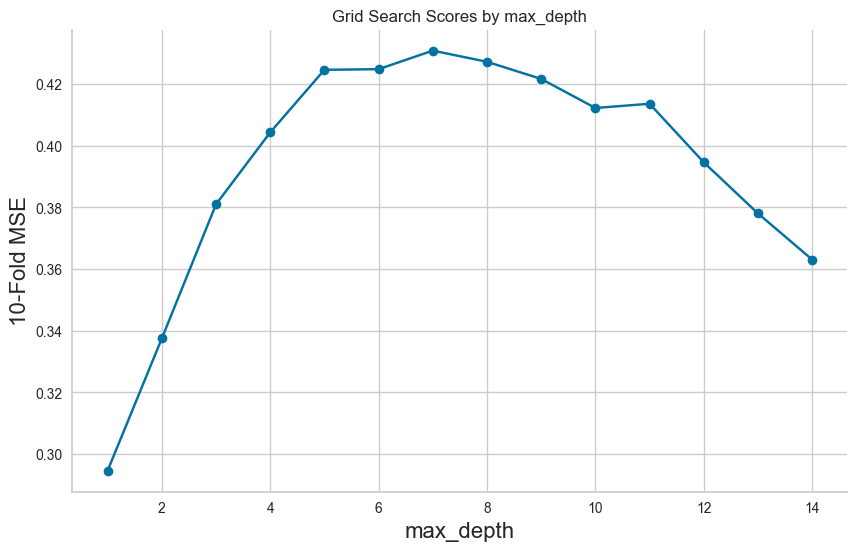

In [60]:
gbr = GradientBoostingRegressor(random_state=42)

# Definir un grid de parámetros más complejo
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': range(1, 15),
    'min_samples_split': [2, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.9, 1.0]
}

gbr_model = train_and_plot_model(gbr, param_grid, X_train, y_train)

Train: 0.9515814811569567
Test: 0.3800798320539087

MAE: 7.7400
MSE: 109.5970
RMSE: 10.4690
R2: 0.3800


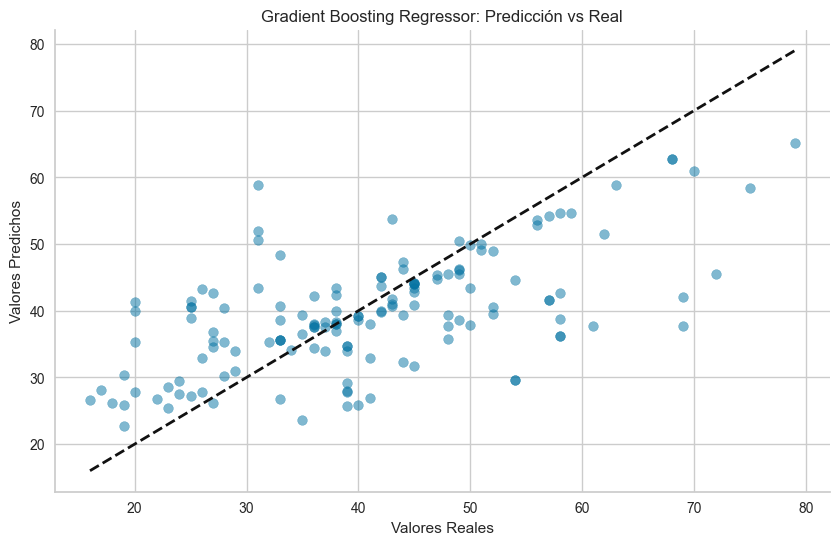

{'MAE': 7.74, 'MSE': 109.597, 'RMSE': 10.469, 'R2': 0.38}

In [61]:
print(f"Train: {gbr_model.score(X_train,y_train)}")
print(f"Test: {gbr_model.score(X_test,y_test)}\n")

evaluate_model_reg(gbr_model,X_test, y_test, title="Gradient Boosting Regressor")

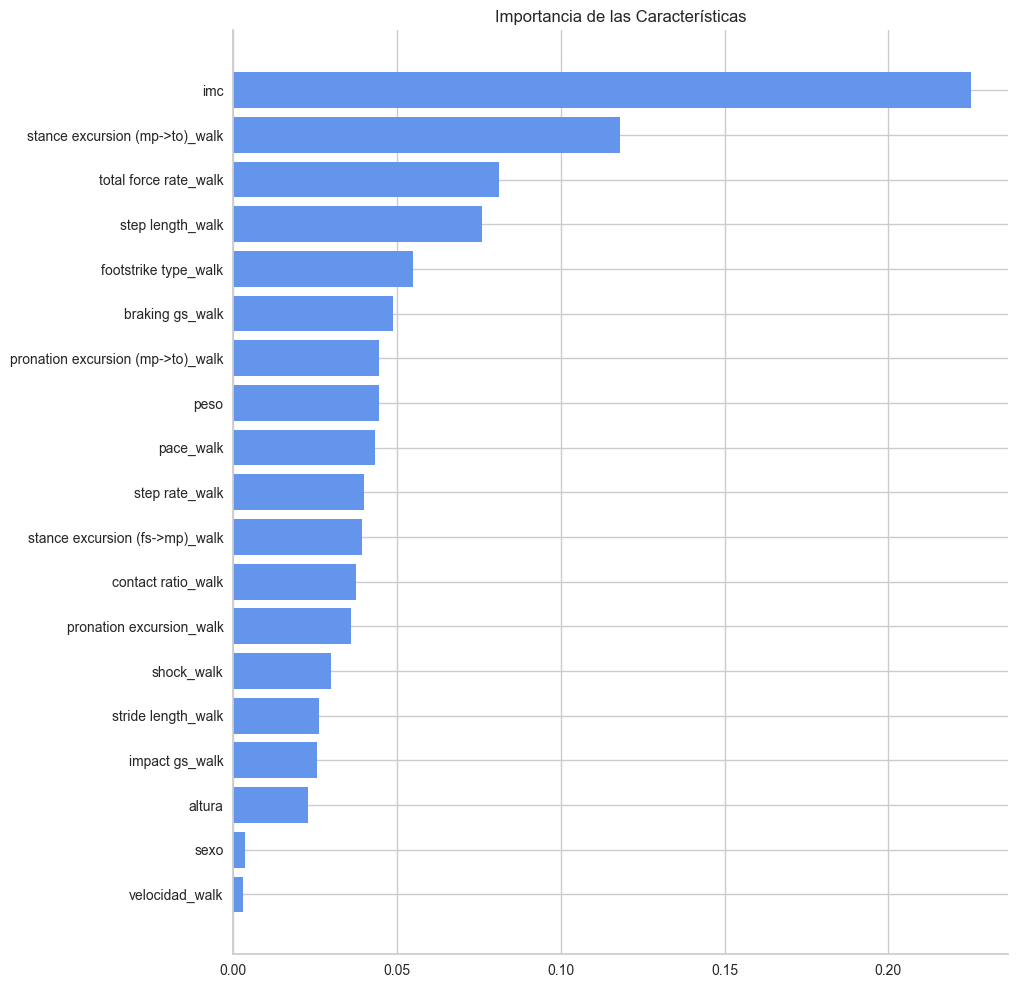

In [62]:
plot_feature_importance(gbr_model, X_train.columns, figsize=(10,12))

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV] END learning_rate=0.05, max_depth=1, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=1, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=1, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=1, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=1, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=1, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=1, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=1, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] EN

[CV] END learning_rate=0.05, max_depth=1, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=1, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=1, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=1, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=1, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=1, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=1, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=1, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=2, min_samples_split=10, n_estima

[CV] END learning_rate=0.05, max_depth=2, min_samples_split=20, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, min_samples_split=20, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, min_samples_split=20, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, min_samples_split=20, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, min_samples_split=20, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, min_samples_split=20, n_estima

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=20, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=20, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=20, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=20, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=20, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=20, n_estima

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=20, n_estima

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=20, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=20, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=20, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=20, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=20, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=20, n_estima

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=20, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=20, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=20, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=20, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=20, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=20, n_estima

[CV] END learning_rate=0.05, max_depth=7, min_samples_split=10, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=10, n_estimators=150, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=10, n_estimators=150, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=10, n_estimators=150, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=10, n_estimators=150, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=10, n_estimators=150, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=10, n_estimators=150, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=10, n_estimators=150, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=7, min_samples_split=10, n_estima

[CV] END learning_rate=0.05, max_depth=8, min_samples_split=10, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=8, min_samples_split=10, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=8, min_samples_split=10, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=8, min_samples_split=10, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=8, min_samples_split=10, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=8, min_samples_split=10, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=8, min_samples_split=10, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=8, min_samples_split=10, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=8, min_samples_split=10, n_estima

[CV] END learning_rate=0.05, max_depth=9, min_samples_split=10, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=9, min_samples_split=10, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=9, min_samples_split=10, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=9, min_samples_split=10, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=9, min_samples_split=10, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=9, min_samples_split=10, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=9, min_samples_split=10, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=9, min_samples_split=10, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=9, min_samples_split=10, n_estima

[CV] END learning_rate=0.1, max_depth=1, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=1, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=1, min_samples_split=10, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=1, min_samples_split=10, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=1, min_samples_split=10, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=1, min_samples_split=10, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=1, min_samples_split=10, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=1, min_samples_split=10, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=1, min_samples_split=10, n_estimators=100,

[CV] END learning_rate=0.1, max_depth=2, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=10, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=10, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=10, n_estimators=100,

[CV] END learning_rate=0.1, max_depth=2, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100,

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100,

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=20, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=20, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=20, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=20, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=20, n_estimators=150, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=20, n_estimators=150,

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=20, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=20, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=20, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=20, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=20, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=20, n_estimators=150, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=20, n_estimators=150,

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=20, n_estimators=100,

[CV] END learning_rate=0.1, max_depth=7, min_samples_split=20, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=20, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=20, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=20, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=20, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=20, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_split=20, n_estimators=100,

[CV] END learning_rate=0.1, max_depth=8, min_samples_split=10, n_estimators=150, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=8, min_samples_split=10, n_estimators=150, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=8, min_samples_split=10, n_estimators=150, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=8, min_samples_split=20, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=8, min_samples_split=20, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=8, min_samples_split=20, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=8, min_samples_split=20, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=8, min_samples_split=20, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=8, min_samples_split=20, n_estimators=100,

[CV] END learning_rate=0.1, max_depth=9, min_samples_split=10, n_estimators=150, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=9, min_samples_split=10, n_estimators=150, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=9, min_samples_split=10, n_estimators=150, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=9, min_samples_split=10, n_estimators=150, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=9, min_samples_split=10, n_estimators=150, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=9, min_samples_split=10, n_estimators=150, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=9, min_samples_split=10, n_estimators=150, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=9, min_samples_split=10, n_estimators=150, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=9, min_samples_split=10, n_estimators=150,

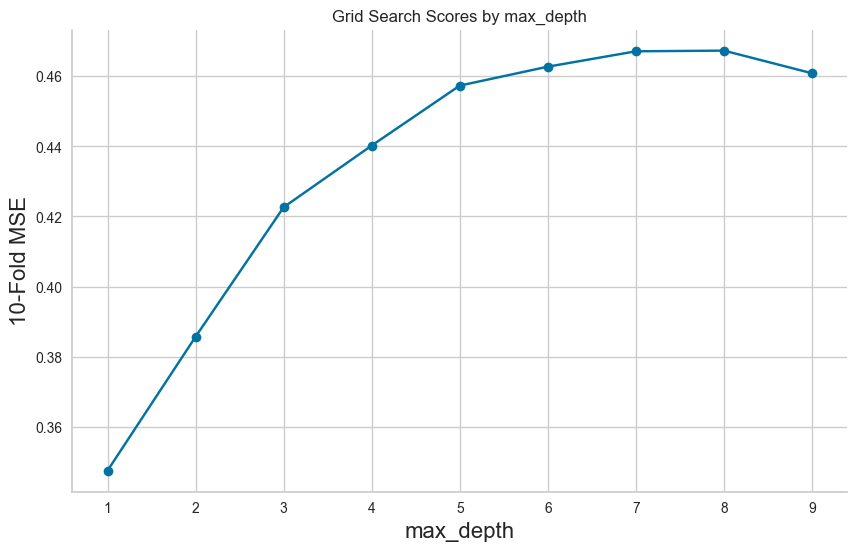

In [63]:
columns = ['pace_walk','step rate_walk', 'braking gs_walk', 'footstrike type_walk', 'total force rate_walk',
           'step length_walk','stance excursion (fs->mp)_walk', 'stance excursion (mp->to)_walk', 'imc']

# Definir un grid de parámetros más complejo
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': range(1, 10),
    'min_samples_split': [10, 20],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.5, 0.7]
}

gbr_model_2 = train_and_plot_model(gbr, param_grid, X_train[columns], y_train, cv=10)

Train: 0.9841659511012273
Test: 0.42683946430327424

MAE: 7.1670
MSE: 101.3300
RMSE: 10.0660
R2: 0.4270


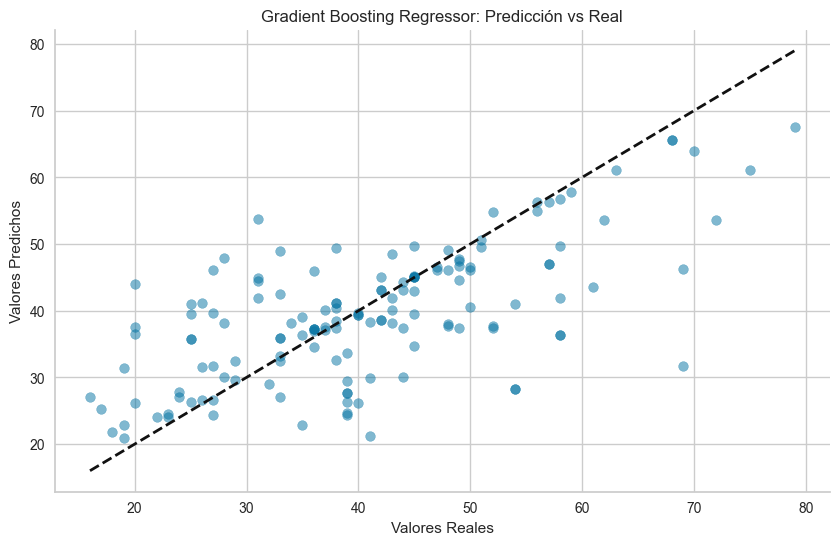

{'MAE': 7.167, 'MSE': 101.33, 'RMSE': 10.066, 'R2': 0.427}

In [64]:
print(f"Train: {gbr_model_2.score(X_train[columns],y_train)}")
print(f"Test: {gbr_model_2.score(X_test[columns],y_test)}\n")
evaluate_model_reg(gbr_model_2,X_test[columns], y_test, title="Gradient Boosting Regressor")

### Gradient Boosting Regressor con RandomSearchCV

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best cross-validation score (MSE): 91.90410473539082
Best mean cross-validation score: -91.904
Best parameters: {'learning_rate': 0.05, 'max_depth': 9, 'min_samples_split': 16, 'n_estimators': 150, 'subsample': 0.7}


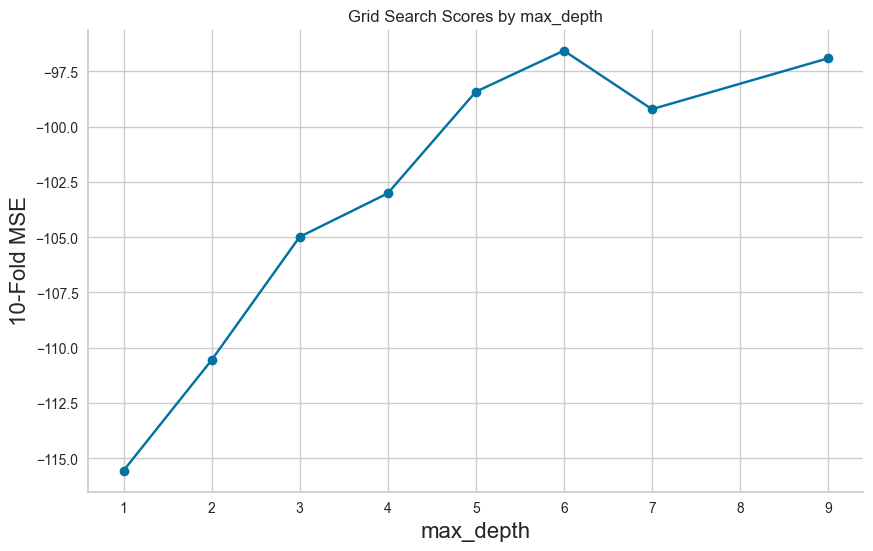

In [65]:
param_dist = {
    'n_estimators': [100, 150],
    'max_depth': range(1, 10),
    'min_samples_split': sp_randint(10, 20),
    'learning_rate': [0.05, 0.1],
    'subsample': [0.5, 0.7]
}

gbr_model_3 = train_and_plot_model_randomsearchcv(gbr, param_dist, X_train[columns], y_train)

Train: 0.9885997671496616
Test: 0.46768601112651975

MAE: 6.9740
MSE: 94.1090
RMSE: 9.7010
R2: 0.4680


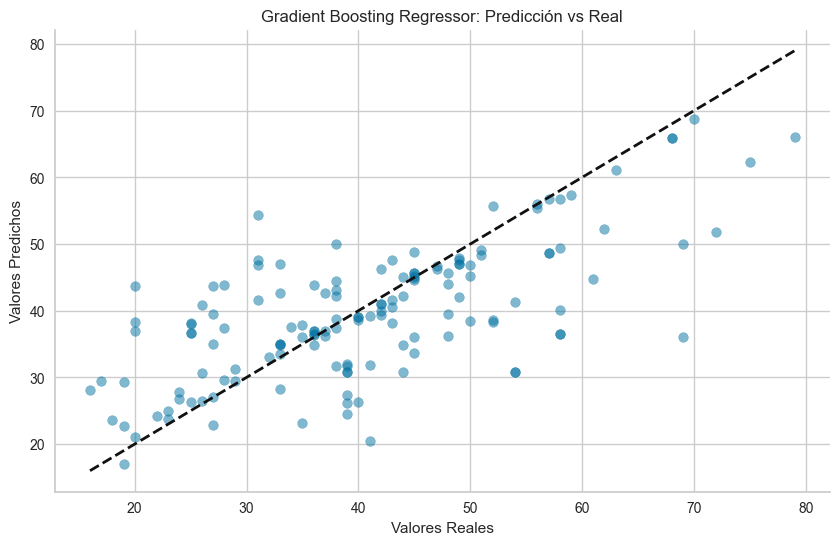

{'MAE': 6.974, 'MSE': 94.109, 'RMSE': 9.701, 'R2': 0.468}

In [66]:
print(f"Train: {gbr_model_3.score(X_train[columns],y_train)}")
print(f"Test: {gbr_model_3.score(X_test[columns],y_test)}\n")
evaluate_model_reg(gbr_model_3,X_test[columns], y_test, title="Gradient Boosting Regressor")

In [67]:
y_pred = gbr_model_3.predict(X_test[columns])
print("Comparación de valores reales y predichos:")
for real, pred in zip(y_test[:10], y_pred[:10]):
    print(f'Real: {real}, Predicho: {pred}')

Comparación de valores reales y predichos:
Real: 29, Predicho: 31.2271197186618
Real: 35, Predicho: 23.22535962625706
Real: 35, Predicho: 37.854869903630316
Real: 29, Predicho: 29.426300777363796
Real: 27, Predicho: 43.69025961373089
Real: 75, Predicho: 62.26248739283441
Real: 59, Predicho: 57.37432280395004
Real: 27, Predicho: 39.45618902267899
Real: 61, Predicho: 44.83323066833493
Real: 19, Predicho: 29.31707946800116


## 6. Bagging Regressor

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END .............................estimator__max_depth=1; total time=   0.1s
[CV] END .............................estimator__max_depth=1; total time=   0.1s
[CV] END .............................estimator__max_depth=1; total time=   0.1s
[CV] END .............................estimator__max_depth=2; total time=   0.2s
[CV] END .............................estimator__max_depth=2; total time=   0.2s
[CV] END .............................estimator__max_depth=2; total time=   0.2s
[CV] END .............................estimator__max_depth=3; total time=   0.2s
[CV] END .............................estimator__max_depth=3; total time=   0.2s
[CV] END .............................estimator__max_depth=3; total time=   0.2s
[CV] END .............................estimator__max_depth=4; total time=   0.2s
[CV] END .............................estimator__max_depth=4; total time=   0.2s
[CV] END .............................estimator_

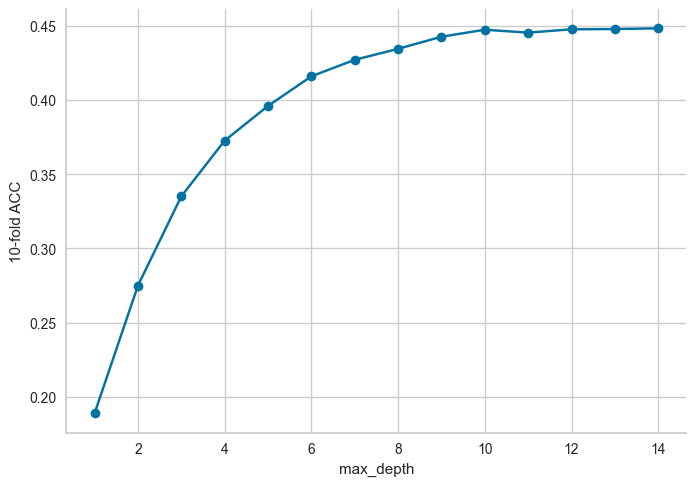

In [68]:
maxDepth = range(1,15)
tuned_parameters = {'estimator__max_depth': maxDepth}

grid = GridSearchCV(
    BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=0, n_estimators=200), 
    param_grid=tuned_parameters, cv=3, verbose=2) 

grid.fit(X_train, y_train)
baggingModel = grid.best_estimator_

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print(f"\nTrain: {baggingModel.score(X_train,y_train)}")
print(f"Test: {baggingModel.score(X_test,y_test)}")

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

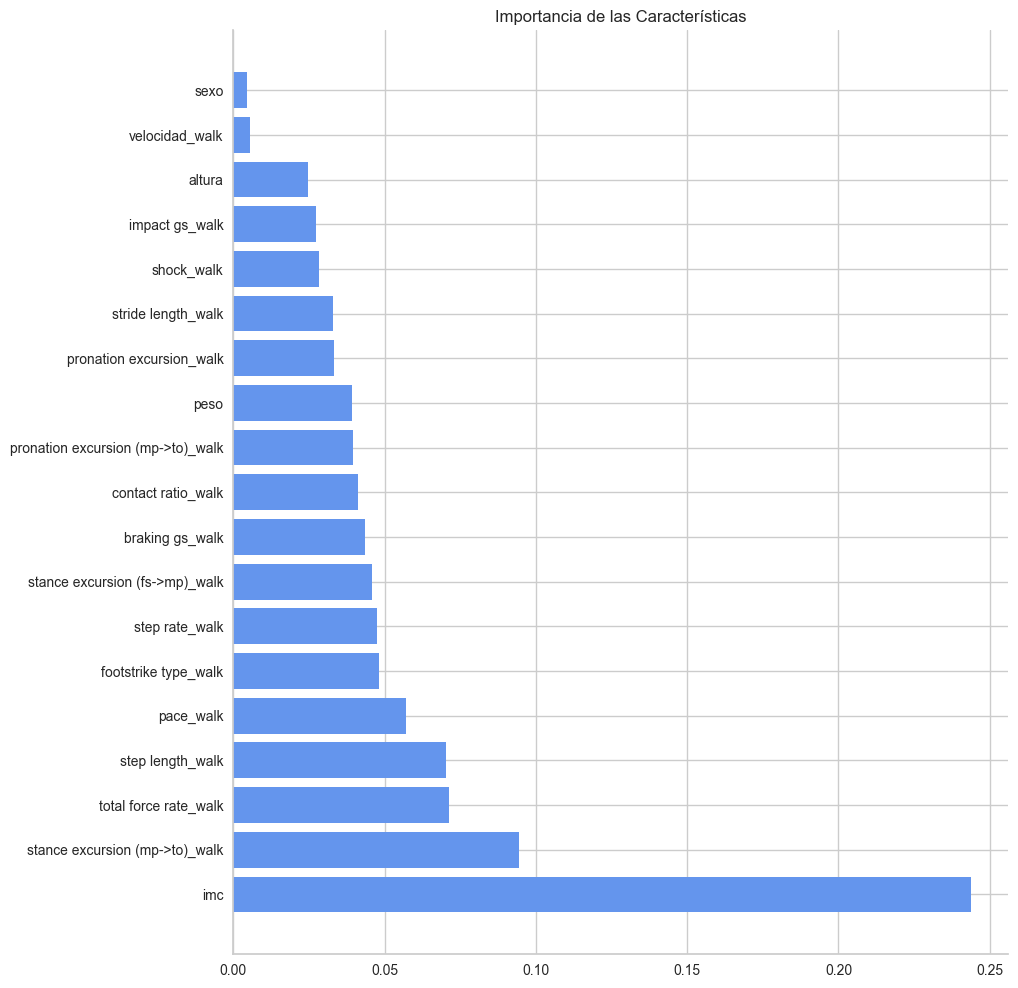

In [69]:
plot_feature_importances_bagging(baggingModel, X_train.columns, figsize=(10,12))

MAE: 7.3790
MSE: 97.4850
RMSE: 9.8730
R2: 0.4490


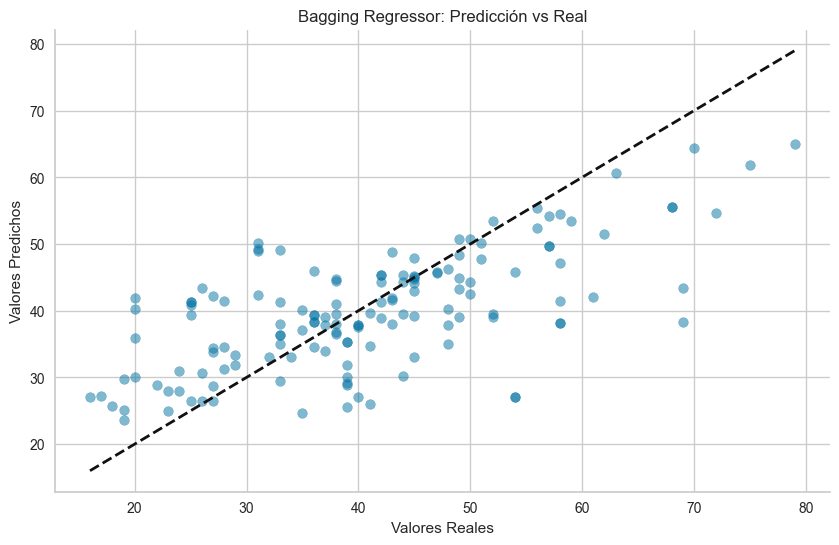

{'MAE': 7.379, 'MSE': 97.485, 'RMSE': 9.873, 'R2': 0.449}

In [70]:
evaluate_model_reg(baggingModel,X_test, y_test, title="Bagging Regressor")

### Bagging Regressor con Selección de Características

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END .............................estimator__max_depth=1; total time=   0.1s
[CV] END .............................estimator__max_depth=1; total time=   0.1s
[CV] END .............................estimator__max_depth=1; total time=   0.1s
[CV] END .............................estimator__max_depth=2; total time=   0.1s
[CV] END .............................estimator__max_depth=2; total time=   0.1s
[CV] END .............................estimator__max_depth=2; total time=   0.1s
[CV] END .............................estimator__max_depth=3; total time=   0.1s
[CV] END .............................estimator__max_depth=3; total time=   0.1s
[CV] END .............................estimator__max_depth=3; total time=   0.1s
[CV] END .............................estimator__max_depth=4; total time=   0.1s
[CV] END .............................estimator__max_depth=4; total time=   0.1s
[CV] END .............................estimator_

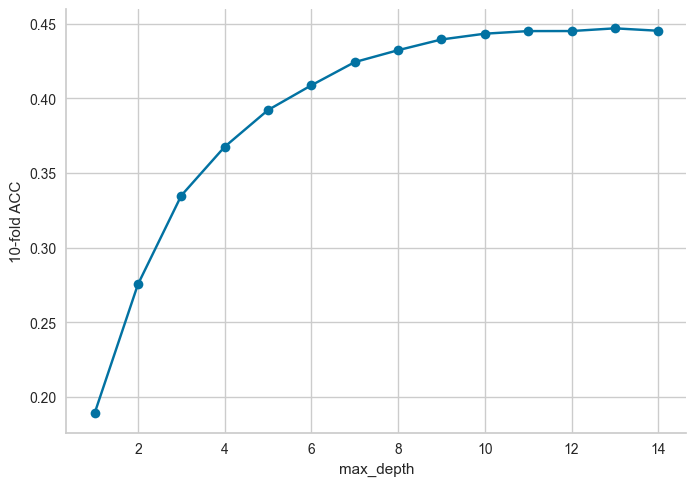

In [71]:
columns = ['pace_walk', 'step rate_walk', 'footstrike type_walk', 'total force rate_walk',
           'step length_walk', 'stance excursion (mp->to)_walk', 'imc']

maxDepth = range(1,15)
tuned_parameters = {'estimator__max_depth': maxDepth}

grid = GridSearchCV(
    BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=0, n_estimators=200), 
    param_grid=tuned_parameters, cv=3, verbose=2) 

grid.fit(X_train[columns], y_train)
baggingModel_2 = grid.best_estimator_

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print(f"\nTrain: {baggingModel_2.score(X_train[columns],y_train)}")
print(f"Test: {baggingModel_2.score(X_test[columns],y_test)}")

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

MAE: 7.1680
MSE: 89.4090
RMSE: 9.4560
R2: 0.4940


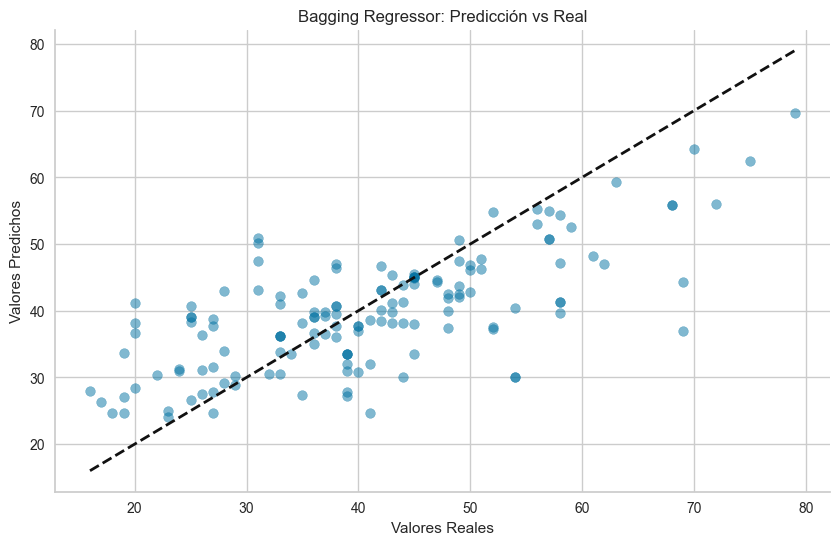

{'MAE': 7.168, 'MSE': 89.409, 'RMSE': 9.456, 'R2': 0.494}

In [72]:
evaluate_model_reg(baggingModel_2,X_test[columns], y_test, title="Bagging Regressor")

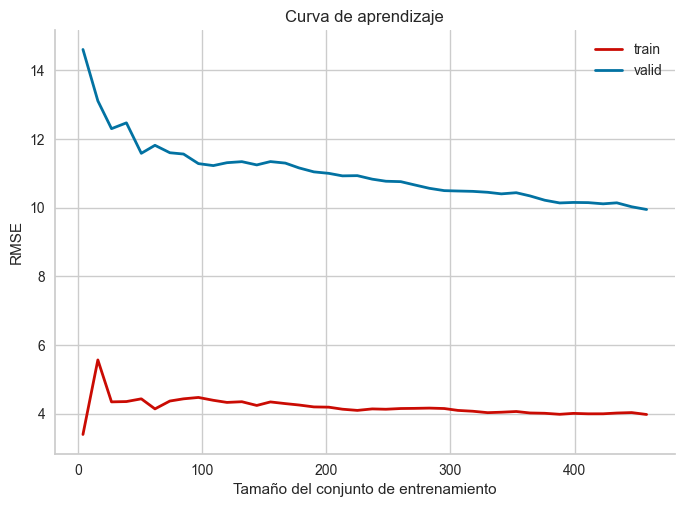

In [73]:
# Curva de Aprendizaje
train_sizes, train_scores, valid_scores = learning_curve(
    baggingModel_2, X_train[columns], y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=2, label="valid")
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.title('Curva de aprendizaje')
plt.legend()
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [74]:
y_pred = baggingModel_2.predict(X_test[columns])
print("Comparación de valores reales y predichos:")
for real, pred in zip(y_test[:10], y_pred[:10]):
    print(f'Real: {real}, Predicho: {pred}')

Comparación de valores reales y predichos:
Real: 29, Predicho: 28.78902724363164
Real: 35, Predicho: 27.40203257030282
Real: 35, Predicho: 42.66023458853238
Real: 29, Predicho: 30.19992916689276
Real: 27, Predicho: 38.778332679207594
Real: 75, Predicho: 62.43
Real: 59, Predicho: 52.5385046461507
Real: 27, Predicho: 37.69529850111199
Real: 61, Predicho: 48.25954867149758
Real: 19, Predicho: 33.656195157182


## 7. Extra Trees

In [75]:
extra_trees = ExtraTreesRegressor(random_state=42) # Definición del modelo

# Definición del espacio de parámetros para RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': range(5, 15),
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 4, 10, 15],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Configuración de RandomizedSearchCV
random_search = RandomizedSearchCV(extra_trees, param_distributions=param_dist, 
                                   n_iter=100, scoring='neg_mean_squared_error', 
                                   cv=10, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

# Mejores parámetros y mejor score encontrado
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score (negative MSE):", random_search.best_score_)

et_model = random_search.best_estimator_ # Obtener el mejor modelo
predictions = et_model.predict(X_test) # Predicciones

# Métricas de rendimiento
print("Test MSE:", mean_squared_error(y_test, predictions))
print("Test R2:", r2_score(y_test, predictions))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 12}
Best cross-validation score (negative MSE): -103.1495523745162
Test MSE: 90.2179701638612
Test R2: 0.48969275360211717


Train: 0.8377363896948952
Test: 0.48969275360211717

MAE: 7.4220
MSE: 90.2180
RMSE: 9.4980
R2: 0.4900


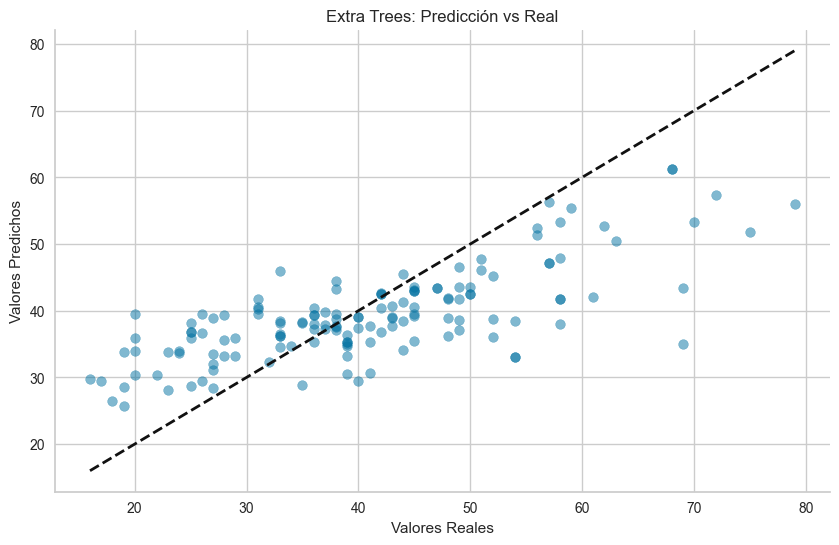

{'MAE': 7.422, 'MSE': 90.218, 'RMSE': 9.498, 'R2': 0.49}

In [76]:
print(f"Train: {et_model.score(X_train,y_train)}")
print(f"Test: {et_model.score(X_test,y_test)}\n")
evaluate_model_reg(et_model,X_test, y_test, title="Extra Trees")

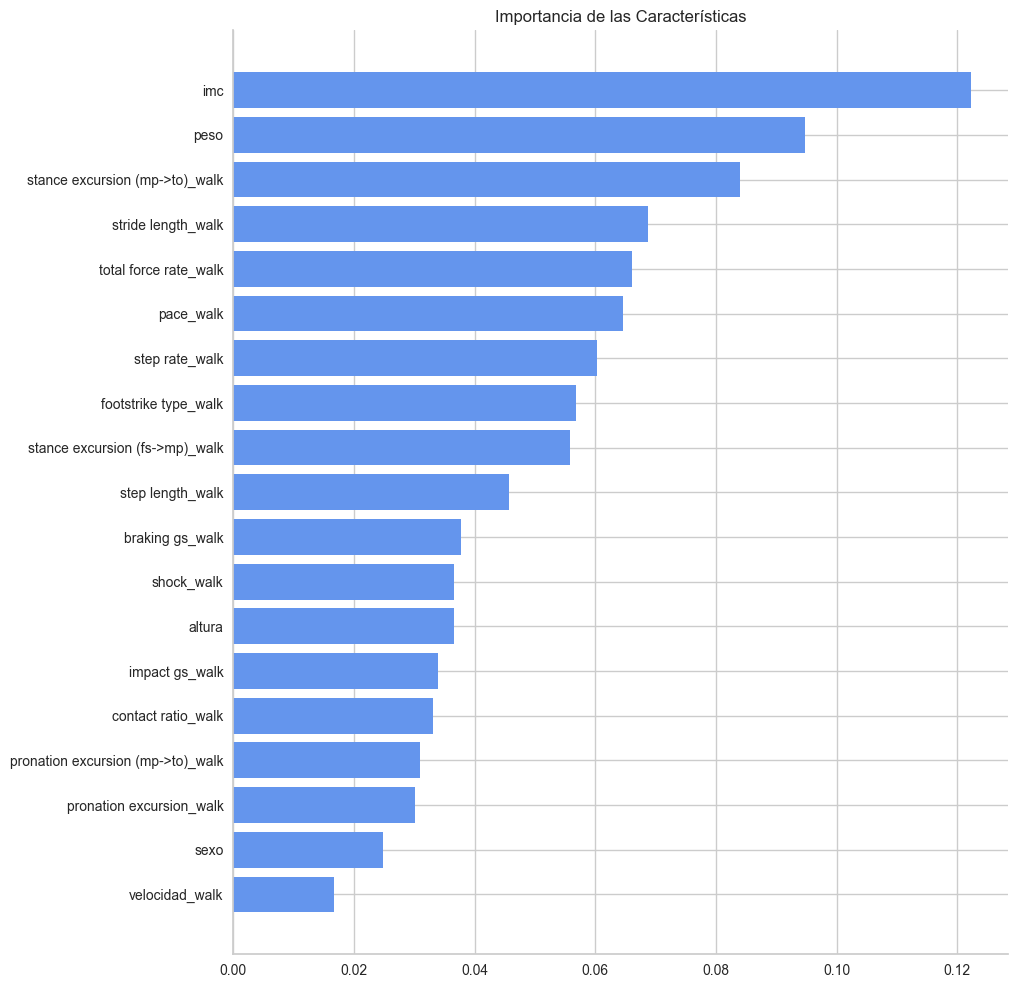

In [77]:
plot_feature_importance(et_model, X_train.columns, figsize=(10,12))

### Extra Trees con Selección de Características

In [78]:
columns = ['peso', 'pace_walk', 'step rate_walk', 'stride length_walk', 'footstrike type_walk',
           'total force rate_walk', 'stance excursion (mp->to)_walk', 'imc', 'step length_walk']

random_search.fit(X_train[columns], y_train)

# Mejores parámetros y mejor score encontrado
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score (negative MSE):", random_search.best_score_)

et_model_2 = random_search.best_estimator_ # Obtener el mejor modelo
predictions = et_model_2.predict(X_test[columns]) # Predicciones

# Métricas de rendimiento
print("Test MSE:", mean_squared_error(y_test, predictions))
print("Test R2:", r2_score(y_test, predictions))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 12}
Best cross-validation score (negative MSE): -99.90171510716273
Test MSE: 82.21552929589849
Test R2: 0.5349576111063902


Train: 0.8328797268992061
Test: 0.5349576111063902

MAE: 7.2670
MSE: 82.2160
RMSE: 9.0670
R2: 0.5350


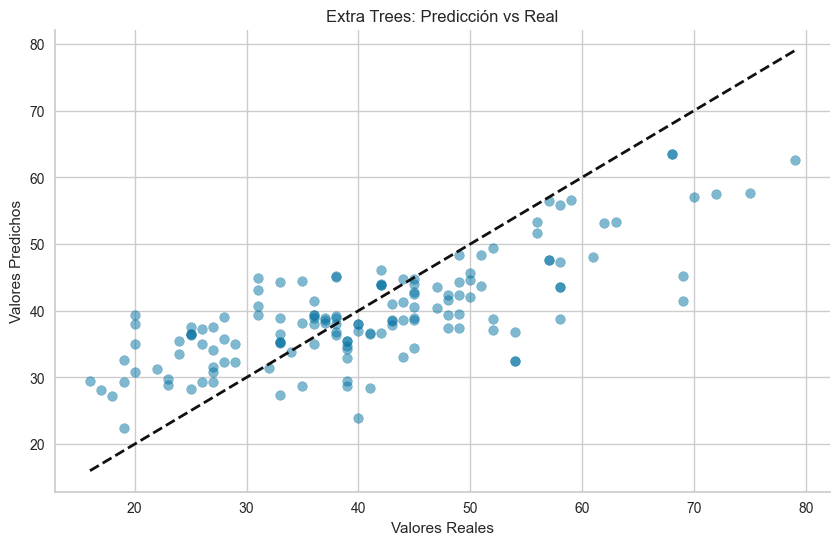

{'MAE': 7.267, 'MSE': 82.216, 'RMSE': 9.067, 'R2': 0.535}

In [79]:
print(f"Train: {et_model_2.score(X_train[columns],y_train)}")
print(f"Test: {et_model_2.score(X_test[columns],y_test)}\n")
evaluate_model_reg(et_model_2,X_test[columns], y_test, title="Extra Trees")

In [80]:
y_pred = et_model_2.predict(X_test[columns])
print("Comparación de valores reales y predichos:")
for real, pred in zip(y_test[:10], y_pred[:10]):
    print(f'Real: {real}, Predicho: {pred}')

Comparación de valores reales y predichos:
Real: 29, Predicho: 34.938003735841995
Real: 35, Predicho: 28.782103874152448
Real: 35, Predicho: 44.40529817132044
Real: 29, Predicho: 32.274647314561186
Real: 27, Predicho: 37.50579707459553
Real: 75, Predicho: 57.60453844187353
Real: 59, Predicho: 56.61607108317438
Real: 27, Predicho: 34.12505297248425
Real: 61, Predicho: 48.029634408126256
Real: 19, Predicho: 32.553082528626014


## 8. ElasticNet

ElasticNet MSE: 108.46294011684489
ElasticNet R2: 0.3864922453174744

Train: 0.38838191246105846
Test: 0.3864922453174744

MAE: 8.2870
MSE: 108.4630
RMSE: 10.4150
R2: 0.3860


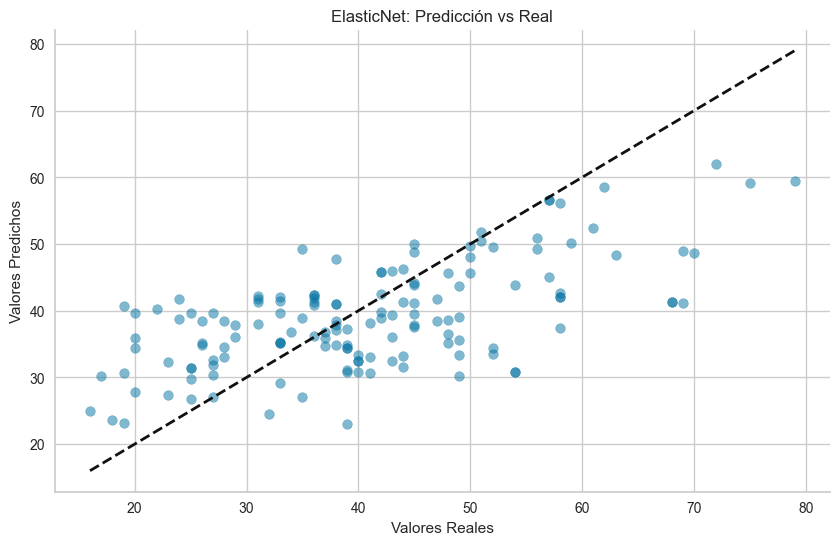

{'MAE': 8.287, 'MSE': 108.463, 'RMSE': 10.415, 'R2': 0.386}

In [160]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Configurar el modelo ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Entrenar el modelo
elastic_net.fit(X_train, y_train)

# Evaluar el modelo
y_pred_en = elastic_net.predict(X_test)
print(f"ElasticNet MSE: {mean_squared_error(y_test, y_pred_en)}")
print(f"ElasticNet R2: {r2_score(y_test, y_pred_en)}\n")
print(f"Train: {elastic_net.score(X_train,y_train)}")
print(f"Test: {elastic_net.score(X_test,y_test)}\n")

evaluate_model_reg(elastic_net,X_test, y_test, title="ElasticNet")

Best parameters for ElasticNet: {'alpha': 0.01, 'l1_ratio': 0.2}
Best score for ElasticNet: 119.69518997209795

Train: 0.3974444838716319
Test: 0.379231834038814

MAE: 8.3170
MSE: 109.7470
RMSE: 10.4760
R2: 0.3790


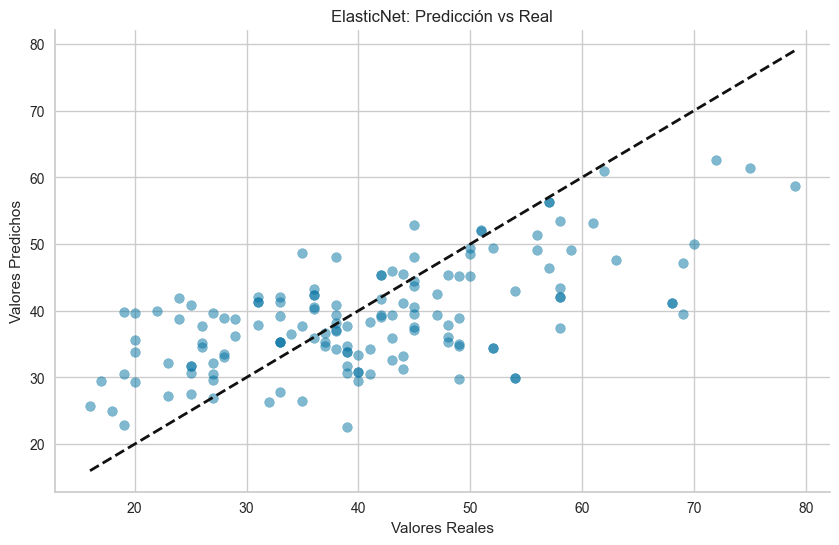

{'MAE': 8.317, 'MSE': 109.747, 'RMSE': 10.476, 'R2': 0.379}

In [161]:
# Definir el rango de parámetros para ElasticNet
params_en = {
    'alpha': [0.005, 0.01, 0.1, 0.5, 1, 2],
    'l1_ratio': [0.2, 0.5, 0.8]
}

# Configurar GridSearchCV
grid_en = GridSearchCV(ElasticNet(random_state=42), params_en, cv=5, scoring='neg_mean_squared_error')
grid_en.fit(X_train, y_train)
elasticnet_model = grid_en.best_estimator_

# Mejores parámetros y score
print(f"Best parameters for ElasticNet: {grid_en.best_params_}")
print(f"Best score for ElasticNet: {-grid_en.best_score_}\n")
print(f"Train: {elasticnet_model.score(X_train,y_train)}")
print(f"Test: {elasticnet_model.score(X_test,y_test)}\n")
evaluate_model_reg(elasticnet_model, X_test, y_test, title="ElasticNet")

## 9. Kernel Ridge

Kernel Ridge MSE: 130.93820403400252
Kernel Ridge R2: 0.25936358103031576

Train: 0.5693897582396739
Test: 0.25936358103031576

MAE: 8.4980
MSE: 130.9380
RMSE: 11.4430
R2: 0.2590


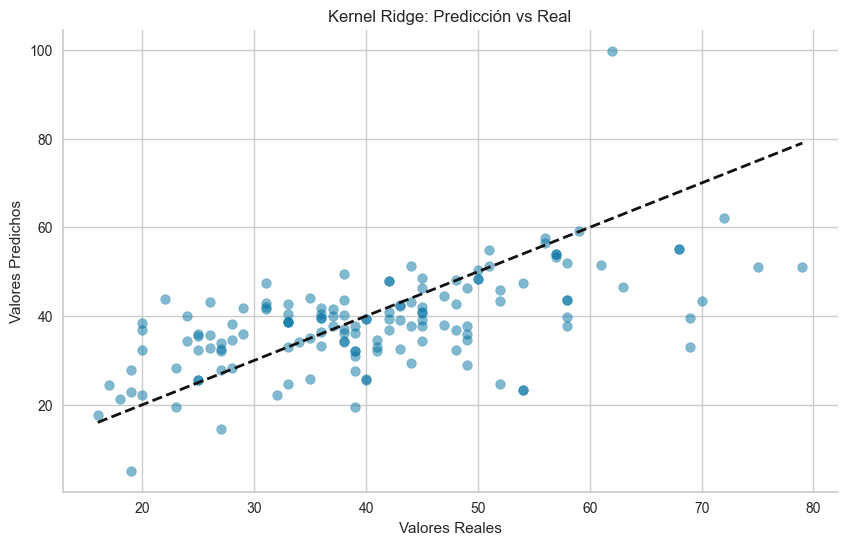

{'MAE': 8.498, 'MSE': 130.938, 'RMSE': 11.443, 'R2': 0.259}

In [165]:
from sklearn.kernel_ridge import KernelRidge

# Configurar el modelo Kernel Ridge
kernel_ridge = KernelRidge(alpha=1.0, kernel='polynomial', degree=2)

# Entrenar el modelo
kernel_ridge.fit(X_train, y_train)

# Evaluar el modelo
y_pred_kr = kernel_ridge.predict(X_test)
print("Kernel Ridge MSE:", mean_squared_error(y_test, y_pred_kr))
print("Kernel Ridge R2:", r2_score(y_test, y_pred_kr))
print(f"\nTrain: {kernel_ridge.score(X_train,y_train)}")
print(f"Test: {kernel_ridge.score(X_test,y_test)}\n")
evaluate_model_reg(kernel_ridge,X_test, y_test, title="Kernel Ridge")

### Kernel Ridge y GridSearchCV

Best parameters for Kernel Ridge: {'alpha': 10, 'degree': 2, 'kernel': 'polynomial'}
Best score for Kernel Ridge: 139.6511896211203

Train: 0.5335446789475764
Test: 0.32091494572363444

MAE: 8.3480
MSE: 120.0560
RMSE: 10.9570
R2: 0.3210


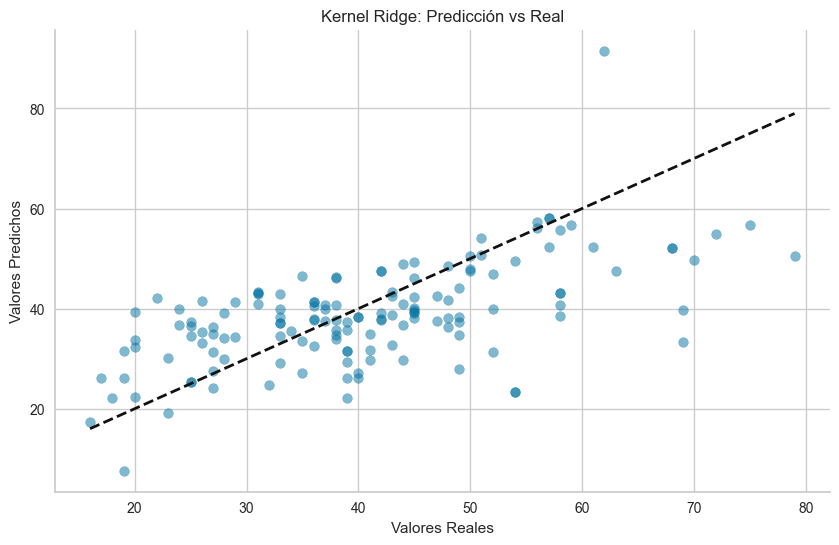

{'MAE': 8.348, 'MSE': 120.056, 'RMSE': 10.957, 'R2': 0.321}

In [166]:
# Definir el rango de parámetros para Kernel Ridge
params_kr = {
    'alpha': [0.1, 1, 10],
    'kernel': ['polynomial', 'rbf'],
    'degree': [2, 3, 4]  # Solo aplicable si kernel es 'polynomial'
}

# Configurar GridSearchCV
grid_kr = GridSearchCV(KernelRidge(), params_kr, cv=5, scoring='neg_mean_squared_error')
grid_kr.fit(X_train, y_train)
kernel_ridge_2 = grid_kr.best_estimator_

# Mejores parámetros y score
print("Best parameters for Kernel Ridge:", grid_kr.best_params_)
print("Best score for Kernel Ridge:", -grid_kr.best_score_)
print(f"\nTrain: {kernel_ridge_2.score(X_train,y_train)}")
print(f"Test: {kernel_ridge_2.score(X_test,y_test)}\n")

evaluate_model_reg(kernel_ridge_2,X_test, y_test, title="Kernel Ridge")

## 10. LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2971
[LightGBM] [Info] Number of data points in the train set: 573, number of used features: 18
[LightGBM] [Info] Start training from score 38.537522
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

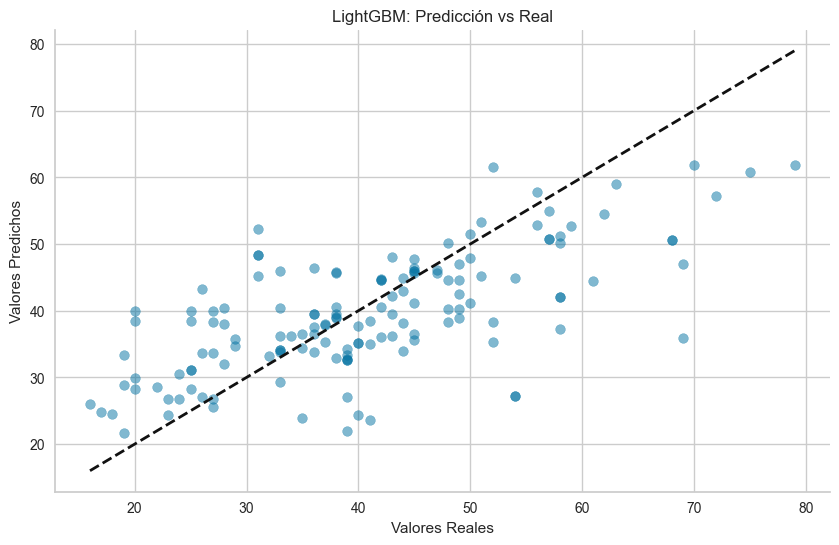

{'MAE': 7.457, 'MSE': 95.989, 'RMSE': 9.797, 'R2': 0.457}

In [170]:
import lightgbm as lgb

# Configurar el modelo LightGBM
lgbm_regressor = lgb.LGBMRegressor(num_leaves=31, learning_rate=0.05, n_estimators=100)

# Entrenar el modelo
lgbm_regressor.fit(X_train, y_train)

# Evaluar el modelo
y_pred_lgbm = lgbm_regressor.predict(X_test)
print("LightGBM MSE:", mean_squared_error(y_test, y_pred_lgbm))
print("LightGBM R2:", r2_score(y_test, y_pred_lgbm))
evaluate_model_reg(lgbm_regressor,X_test, y_test, title="LightGBM")

In [169]:
print(f"Train: {lgbm_regressor.score(X_train,y_train)}")
print(f"Test: {lgbm_regressor.score(X_test,y_test)}")

Train: 0.8974788781727983
Test: 0.4570493771862665


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2380
[LightGBM] [Info] Number of data points in the train set: 458, number of used features: 18
[LightGBM] [Info] Start training from score 38.624454
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Au

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2382
[LightGBM] [Info] Number of data points in the train set: 458, number of used features: 18
[LightGBM] [Info] Start training from score 38.484716
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2394
[LightGBM] [Info] Number of data points in the train set: 459, number of used features: 18
[LightGBM] [Info] Start training from score 39.019608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2380
[LightGBM] [Info] Number of data points in the train set: 458, number of used features: 18
[LightGBM] [Info] Start training from score 38.624454
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2380
[LightGBM] [Info] Number of data points in the train set: 458, number of used features: 18
[LightGBM] [Info] Start training from score 38.624454
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2385
[LightGBM] [Info] Number of data points in the train set: 45

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2385
[LightGBM] [Info] Number of data points in the train set: 458, number of used features: 18
[LightGBM] [Info] Start training from score 38.344978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2380
[LightGBM] [Info] Number of data points in the train set: 458, number of used features: 18
[LightGBM] [Info] Start training from score 38.624454
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2394
[LightGBM] [Info] Number of data points in the train set: 459, number of used features: 18
[LightGBM] [Info] Start training from score 39.019608
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2385
[LightGBM] [Info] Number of data points in the train set: 458, number of used features: 18
[LightGBM] [Info] Start training from score 38.344978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2394
[LightGBM] [Info] Number of data points in the tr

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Au

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Au

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2382
[LightGBM] [Info] Number of data points in the tr

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2385
[LightGBM] [Info] Number of data points in the train set: 458, number of used features: 18
[LightGBM] [Info] Start training from score 38.344978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2382
[LightGBM] [Info] Number of data points in the train set: 458, number of used features: 18
[LightGBM] [Info] Start training from score 38.484716
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Foun

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Au

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2394
[LightGBM] [Info] Number of data points in the tr

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2971
[LightGBM] [Info] Number of data points in the train set: 573, number of used features: 18
[LightGBM] [Info] Start training from score 38.537522
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

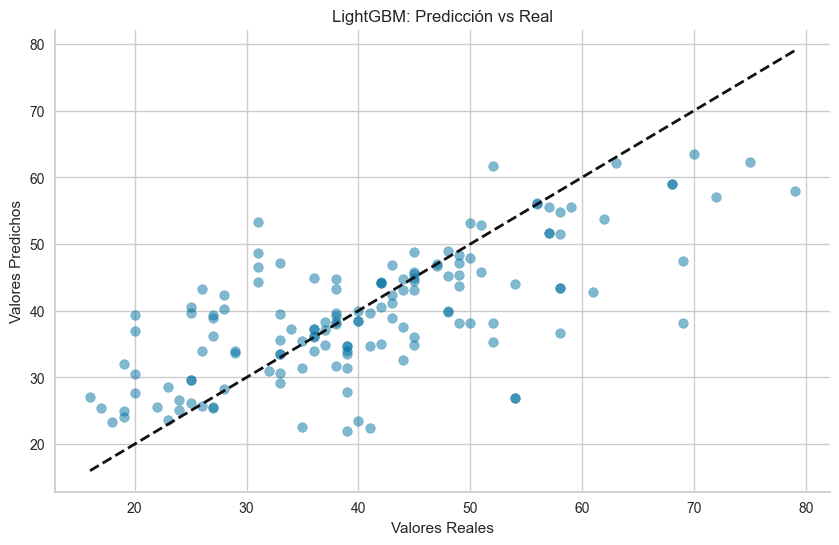

{'MAE': 6.856, 'MSE': 90.585, 'RMSE': 9.518, 'R2': 0.488}

In [167]:
# Definir el rango de parámetros para LightGBM
params_lgbm = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200]
}

# Configurar GridSearchCV
grid_lgbm = GridSearchCV(lgb.LGBMRegressor(random_state=42), params_lgbm, cv=5, scoring='neg_mean_squared_error')
grid_lgbm.fit(X_train, y_train)
lgbm_model = grid_lgbm.best_estimator_

# Mejores parámetros y score
print("Best parameters for LightGBM:", grid_lgbm.best_params_)
print("Best score for LightGBM:", -grid_lgbm.best_score_)
evaluate_model_reg(lgbm_model,X_test, y_test, title="LightGBM")

In [168]:
print(f"Train: {lgbm_model.score(X_train,y_train)}")
print(f"Test: {lgbm_model.score(X_test,y_test)}\n")

Train: 0.9734573170546146
Test: 0.48761916970828056



## 11. XGB Regressor

XGB Regressor MSE: 93.93934164610442
XGB Regressor R2: 0.4686432572492515

Train: 0.9480204202582996
Test: 0.4686432572492515

MAE: 7.2840
MSE: 93.9390
RMSE: 9.6920
R2: 0.4690


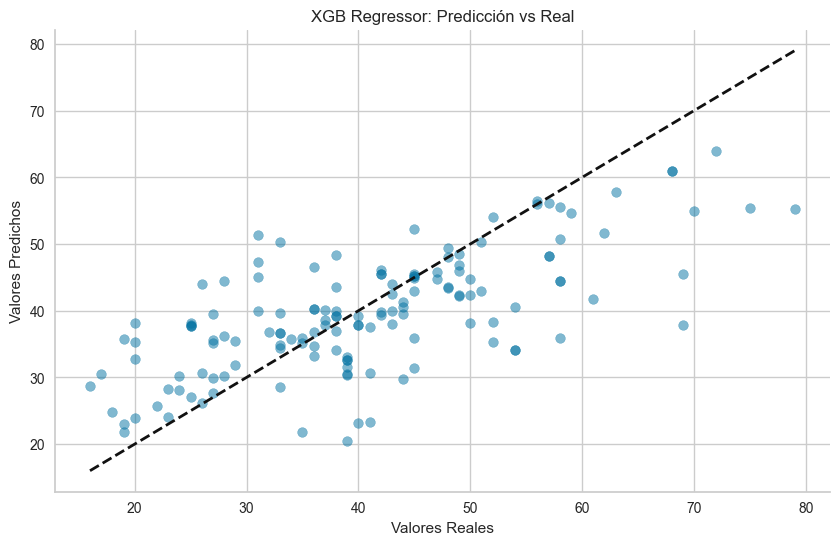

{'MAE': 7.284, 'MSE': 93.939, 'RMSE': 9.692, 'R2': 0.469}

In [172]:
import xgboost as xgb

# Configurar el modelo XGBoost
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Entrenar el modelo
xgb_regressor.fit(X_train, y_train)

# Evaluar el modelo
y_pred_xgb = xgb_regressor.predict(X_test)
print("XGB Regressor MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGB Regressor R2:", r2_score(y_test, y_pred_xgb))
print(f"\nTrain: {xgb_regressor.score(X_train,y_train)}")
print(f"Test: {xgb_regressor.score(X_test,y_test)}\n")
evaluate_model_reg(xgb_regressor, X_test, y_test, title="XGB Regressor")

Best parameters for XGBoost: {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}
Best score for XGBoost: 96.252236288979

Train: 0.9973961670929534
Test: 0.4631769052007956

MAE: 6.6280
MSE: 94.9060
RMSE: 9.7420
R2: 0.4630


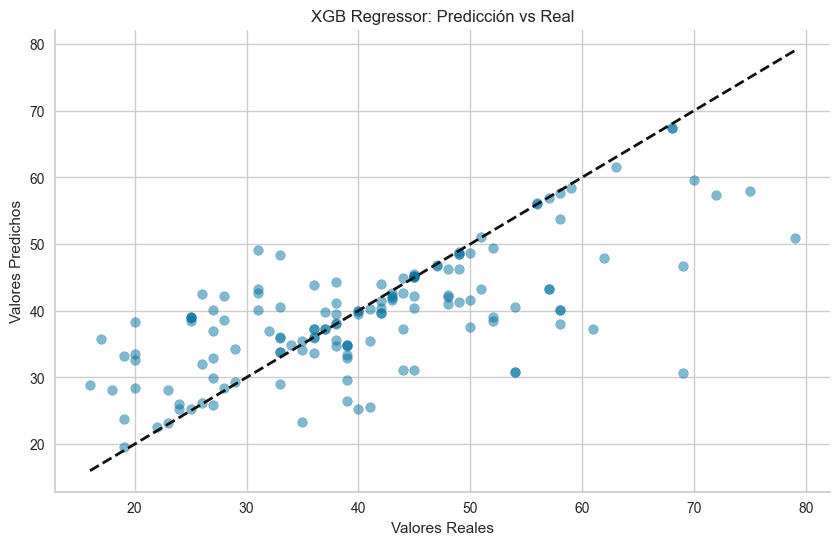

{'MAE': 6.628, 'MSE': 94.906, 'RMSE': 9.742, 'R2': 0.463}

In [171]:
# Definir el rango de parámetros para XGBoost
params_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'colsample_bytree': [0.3, 0.5, 0.7]
}

# Configurar GridSearchCV
grid_xgb = GridSearchCV(xgb.XGBRegressor(objective ='reg:squarederror', random_state=42), params_xgb, cv=5, scoring='neg_mean_squared_error')
grid_xgb.fit(X_train, y_train)
xgb_model = grid_xgb.best_estimator_

# Mejores parámetros y score
print("Best parameters for XGBoost:", grid_xgb.best_params_)
print("Best score for XGBoost:", -grid_xgb.best_score_)
print(f"\nTrain: {xgb_model.score(X_train,y_train)}")
print(f"Test: {xgb_model.score(X_test,y_test)}\n")
evaluate_model_reg(xgb_model,X_test, y_test, title="XGB Regressor")

## Evaluación de modelos

In [177]:
# Diccionario de modelos y sus correspondientes características
modelos = {
    'Decision Tree 2': (dt_model_2, ['peso', 'braking gs_walk', 'footstrike type_walk', 'contact ratio_walk', 'total force rate_walk', 'step length_walk', 'stance excursion (mp->to)_walk','stride length_walk', 'imc']),
    'Random Forest 2': (rf_model_2, X_train.columns.tolist()), 
    'Random Forest 3': (rf_model_3, ['peso', 'pace_walk', 'step rate_walk', 'stride length_walk', 'footstrike type_walk', 'total force rate_walk', 'step length_walk', 'stance excursion (fs->mp)_walk', 'stance excursion (mp->to)_walk', 'imc']),
    'Gradient Boosting Regressor': (gbr_model, X_train.columns.tolist()),
    'Gradient Boosting Regressor 2': (gbr_model_2, ['pace_walk', 'step rate_walk', 'braking gs_walk', 'footstrike type_walk', 'total force rate_walk', 'step length_walk', 'stance excursion (fs->mp)_walk', 'stance excursion (mp->to)_walk', 'imc']),
    'Gradient Boosting Regressor 3': (gbr_model_3, ['pace_walk', 'step rate_walk', 'braking gs_walk', 'footstrike type_walk', 'total force rate_walk', 'step length_walk', 'stance excursion (fs->mp)_walk', 'stance excursion (mp->to)_walk', 'imc']),
    'Bagging Regressor 2': (baggingModel_2, ['pace_walk', 'step rate_walk', 'footstrike type_walk', 'total force rate_walk', 'step length_walk', 'stance excursion (mp->to)_walk', 'imc']),
    'Extra Trees 1': (et_model, X_train.columns.tolist()),
    'Extra Trees 2': (et_model_2, ['peso', 'pace_walk', 'step rate_walk', 'stride length_walk', 'footstrike type_walk', 'total force rate_walk', 'stance excursion (mp->to)_walk', 'imc', 'step length_walk'])
}

# Preparar un DataFrame para almacenar los resultados
resultados = pd.DataFrame(columns=['Modelo', 'MAE', 'MSE', 'RMSE', 'R2'])

# Evaluar cada modelo con sus características correspondientes
for name, (model, columns) in modelos.items():
    start_time = time.time() 
    X_train_selected = X_train[columns]
    X_test_selected = X_test[columns]
    modelo.fit(X_train_selected, y_train)  # Entrenar el modelo
    elapsed_time = round(time.time() - start_time, 3)  # Calcular el tiempo transcurrido
    
    y_pred = modelo.predict(X_test_selected)
    mae = round(mean_absolute_error(y_test, y_pred), 3)
    mse = round(mean_squared_error(y_test, y_pred), 3)
    rmse = round(mse ** 0.5, 3)
    r2 = round(r2_score(y_test, y_pred), 3)
    resultados_df = pd.DataFrame({
        'Modelo': [name],
        'MAE': [mae],
        'MSE': [mse],
        'RMSE': [rmse],
        'R2': [r2],
        'Tiempo de entrenamiento (s)': elapsed_time
    })
    
    print(f"{name} - Train: {model.score(X_train[columns], y_train)}")
    print(f"{name} - Test: {model.score(X_test[columns], y_test)}\n")

    resultados = pd.concat([resultados, resultados_df], ignore_index=True)

resultados.sort_values(by=['R2', 'Tiempo de entrenamiento (s)'], ascending=[False, True], inplace=True)
print(resultados)

Decision Tree 2 - Train: 0.40006471949444344
Decision Tree 2 - Test: 0.19060473974886327

Random Forest 2 - Train: 0.9033705451187493
Random Forest 2 - Test: 0.49033077147973125

Random Forest 3 - Train: 0.911420142647305
Random Forest 3 - Test: 0.5095984277504668

Gradient Boosting Regressor - Train: 0.9515814811569567
Gradient Boosting Regressor - Test: 0.3800798320539087

Gradient Boosting Regressor 2 - Train: 0.9841659511012273
Gradient Boosting Regressor 2 - Test: 0.42683946430327424

Gradient Boosting Regressor 3 - Train: 0.9885997671496616
Gradient Boosting Regressor 3 - Test: 0.46768601112651975

Bagging Regressor 2 - Train: 0.9176815970409401
Bagging Regressor 2 - Test: 0.49426886496443323

Extra Trees 1 - Train: 0.8377363896948952
Extra Trees 1 - Test: 0.48969275360211717

Extra Trees 2 - Train: 0.8328797268992061
Extra Trees 2 - Test: 0.5349576111063902

                          Modelo    MAE     MSE   RMSE     R2  \
8                  Extra Trees 2  7.267  82.216  9.067  0

## Conclusiones

- **Mejor Desempeño General**: El modelo **Extra Trees 2** presenta el mejor equilibrio entre las métricas evaluadas, alcanzando el menor MSE y RMSE, y el mayor R² (`0.535`), indicando que es capaz de explicar aproximadamente el **53.5%** de la variabilidad en los datos. Esto sugiere una buena capacidad de generalización y eficacia en la captura de la complejidad de los datos.

- **Comparación con Otros Modelos**:
   - Los modelos **Random Forest** también muestran un rendimiento competitivo, especialmente **Random Forest 3**, que logra un R² de `0.510`. Esto indica que los enfoques basados en árboles son particularmente efectivos para este conjunto de datos.
   - Los modelos de **Gradient Boosting** y **Bagging Regressor** exhiben un desempeño moderado, con un R² que varía desde 0.380 hasta 0.494. Aunque no superan a los modelos de Extra Trees o Random Forest, aún proporcionan una predicción razonablemente precisa.

- **Desempeño del Decision Tree**:
   - El **Decision Tree 2** muestra un rendimiento significativamente más bajo en comparación con los modelos de ensamble, con un R² de solo 0.191. Esto resalta la tendencia de los árboles de decisión individuales a sobreajustarse y su limitada capacidad para manejar la complejidad sin un método de ensamble.


- **Estrategias de Ensamblaje Ajustadas**: Los ensayos confirmaron la fortaleza de los métodos de ensamble como Extra Trees y Random Forest, destacando su robustez y precisión. A pesar de dedicar un día entero a la optimización de hiperparámetros, se reconoce que existe margen para mejoras futuras. Por ahora, se decidió avanzar, pero se planea regresar a este punto para refinar aún más estos modelos a medida que los plazos del proyecto lo permitan.

- **Análisis Riguroso de Características**: La selección de características para cada modelo se basó en un análisis detallado de su importancia. Este enfoque ha permitido enfocar los modelos en las variables más influyentes, optimizando así la eficiencia sin sacrificar el rendimiento.

- **Evaluación Preliminar y Pruebas Adicionales**: Además de las pruebas iniciales, se contempla realizar evaluaciones adicionales con nuevos conjuntos de datos o en escenarios externos para validar la robustez de los modelos, especialmente del modelo Extra Trees 2, que mostró un excelente balance entre precisión y generalización.

- **Gestión de Recursos Computacionales**: Aunque en las pruebas actuales no se notaron tiempos de ejecución excesivos, se evaluarán los costos computacionales de entrenamiento de cada modelo para asegurar que su implementación sea viable en producción. Esta evaluación ayudará a identificar modelos que, aunque precisos, podrían requerir una inversión desproporcionada de recursos.

- **Patrones y Columnas Comunes**: Los análisis indicaron que ciertas características como 'pace_walk', 'step rate_walk', 'stride length_walk', 'footstrike type_walk', 'total force rate_walk', 'step length_walk', y 'imc' son recurrentemente utilizadas debido a su alta predictibilidad. La repetida selección de estas variables sugiere que encierran elementos fundamentales de los datos que son cruciales para la modelización eficaz.

## Stacking y Voting Regressor

### Stacking

Stacking implica combinar las predicciones de múltiples modelos de regresión mediante un meta-modelo que aprende a optimizar la combinación basada en el rendimiento de los modelos base.

In [94]:
# Características de cada modelo
features_dt_model_2 = set(['peso', 'braking gs_walk', 'footstrike type_walk', 'contact ratio_walk', 'total force rate_walk', 'step length_walk', 'stance excursion (mp->to)_walk','stride length_walk', 'imc'])
features_rf_model_3 = set(['peso', 'pace_walk', 'step rate_walk', 'stride length_walk', 'footstrike type_walk', 'total force rate_walk', 'step length_walk', 'stance excursion (fs->mp)_walk', 'stance excursion (mp->to)_walk', 'imc'])
features_gbr_model_3 = set(['pace_walk', 'step rate_walk', 'braking gs_walk', 'footstrike type_walk', 'total force rate_walk', 'step length_walk', 'stance excursion (fs->mp)_walk', 'stance excursion (mp->to)_walk', 'imc'])

# Características comunes a todos los modelos
common_features = features_dt_model_2 & features_rf_model_3 & features_gbr_model_3

# Características únicas para cada modelo
unique_dt_model_2 = features_dt_model_2 - (features_rf_model_3 | features_gbr_model_3)
unique_rf_model_3 = features_rf_model_3 - (features_dt_model_2 | features_gbr_model_3)
unique_gbr_model_3 = features_gbr_model_3 - (features_dt_model_2 | features_rf_model_3)

print("Características comunes:", common_features)
print("Características únicas para dt_model_2:", unique_dt_model_2)
print("Características únicas para rf_model_3:", unique_rf_model_3)
print("Características únicas para gbr_model_3:", unique_gbr_model_3)

Características comunes: {'step length_walk', 'total force rate_walk', 'footstrike type_walk', 'stance excursion (mp->to)_walk', 'imc'}
Características únicas para dt_model_2: {'contact ratio_walk'}
Características únicas para rf_model_3: set()
Características únicas para gbr_model_3: set()


In [135]:
# Características comunes identificadas
common_features = ['step length_walk','total force rate_walk','footstrike type_walk','stance excursion (mp->to)_walk','imc']

# Crear el Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('et', et_model_2),
        ('rf', rf_model_3),
        ('gbr', gbr_model_3)
    ],
    final_estimator=LinearRegression(),
    cv=5
)

# Entrenar el Stacking Regressor usando solo las características comunes
stacking_regressor.fit(X_train[common_features], y_train)

# Evaluar el modelo en el conjunto de test
score = stacking_regressor.score(X_test[common_features], y_test)
y_pred = stacking_regressor.predict(X_test[common_features])

print(f"Score del Stacking Regressor: {score}\n")
print(f"MAE: {round(mean_absolute_error(y_test, y_pred), 3)}")
print(f"MSE: {round(mean_squared_error(y_test, y_pred), 3)}")
print(f"RMSE: {round(mse ** 0.5, 3)}")
print(f"R2: {round(r2_score(y_test, y_pred), 3)}")

Score del Stacking Regressor: 0.5536440316619045

MAE: 6.762
MSE: 78.912
RMSE: 9.067
R2: 0.554


### Voting Regressor

Es un enfoque de ensamblaje que hace predicciones basadas en la media de varios modelos de regresión

In [125]:
voting_regressor = VotingRegressor(
    estimators=[
        ('et', et_model_2),
        ('rf', rf_model_3),
        ('gbr', gbr_model_3)
    ],
    weights=[1, 1, 1]  # Ajustar los pesos si algunos modelos son consistentemente mejores
)

# Entrenar el Voting Regressor usando solo las características comunes
voting_regressor.fit(X_train[common_features], y_train)

# Evaluar el modelo en el conjunto de test
voting_score = voting_regressor.score(X_test[common_features], y_test)
y_pred = voting_regressor.predict(X_test[common_features])

print(f"Score del Voting Regressor: {voting_score}\n")
print(f"MAE: {round(mean_absolute_error(y_test, y_pred), 3)}")
print(f"MSE: {round(mean_squared_error(y_test, y_pred), 3)}")
print(f"RMSE: {round(mse ** 0.5, 3)}")
print(f"R2: {round(r2_score(y_test, y_pred), 3)}")

Score del Voting Regressor: 0.524033880422744

MAE: 7.02
MSE: 84.147
RMSE: 9.067
R2: 0.524


In [132]:
# Definición de modelos
voting_reg = VotingRegressor(
    estimators=[
        ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
        ('extra_trees', ExtraTreesRegressor(n_estimators=100, random_state=42))
    ],
    weights=[1, 1, 2] 
)

voting_reg.fit(X_train, y_train)
y_pred = voting_reg.predict(X_test)
print(f'Score del Voting Regressor: {voting_reg.score(X_test, y_test)}\n')
print(f"MAE: {round(mean_absolute_error(y_test, y_pred), 3)}")
print(f"MSE: {round(mean_squared_error(y_test, y_pred), 3)}")
print(f"RMSE: {round(mse ** 0.5, 3)}")
print(f"R2: {round(r2_score(y_test, y_pred), 3)}")

Score del Voting Regressor: 0.5340558395913553

MAE: 6.636
MSE: 82.375
RMSE: 9.067
R2: 0.534
